# Trabajo Práctico
Apellido y Nombre del alumno: Evelyn Hermoza

In [ ]:
import pandas as pd
import sklearn as sk
from sklearn import model_selection
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

pd.set_option('display.max_rows', None)
plt.rcParams['figure.figsize'] = [30, 10]

In [ ]:
df_o = pd.read_csv("/content/sample_data/entrenamiento.csv.zip", index_col="id")

# 1.1. Análisis exploratorio de datos

**Cantidad de filas y columnas**

Mediante la sintaxis Shape podemos obtener la cantidad de filas y columnas que posee el data frame

In [ ]:
df_o.shape

(40959, 24)

**Primeros 5 registros**

In [ ]:
df_o.head()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
id,,,,,,,,,,,,,,,,,,,,,
692975,Propiedad,2019-10-12,2019-10-16,2019-10-12,-58.421491,-34.605587,Argentina,Capital Federal,Almagro,NaN,...,1.0,67.0,63.0,200000.0,USD,NaN,Departamento de 3 ambientes en Venta en Almagro,Hermoso 3 ambientes clasico con cocina separad...,Departamento,Venta
410588,Propiedad,2019-10-13,2020-01-21,2019-10-13,-58.513908,-34.622557,Argentina,Capital Federal,Monte Castro,NaN,...,1.0,39.0,39.0,106000.0,USD,NaN,DEPARTAMENTO 2 AMBIENTES A ESTRENAR - MONTE CA...,Corredor Responsable: Gustavo Guastello - C.U....,Departamento,Venta
526562,Propiedad,2020-03-28,2020-08-17,2020-03-28,-58.437803,-34.601369,Argentina,Capital Federal,Villa Crespo,NaN,...,1.0,50.0,48.0,129900.0,USD,NaN,Excelente 2 Amb en el corazón de Villa Crespo!,Corredor Responsable: Uno Bienes Raices SRL - ...,Departamento,Venta
480579,Propiedad,2019-10-18,2019-11-02,2019-10-18,-58.428966,-34.604013,Argentina,Capital Federal,Almagro,NaN,...,1.0,37.0,33.0,92000.0,USD,NaN,Departamento de 2 ambientes en Venta en Almagr...,"Hermoso 2 ambientes con balcon al frente, 36m2...",Departamento,Venta
65937,Propiedad,2019-07-08,2019-09-14,2019-07-08,-58.497026,-34.644835,Argentina,Capital Federal,Mataderos,NaN,...,1.0,43.0,40.0,87000.0,USD,NaN,Dpto de 2 Amb con Balcón,Corredor Responsable: Hernan Perrone - C.U.C.I...,Departamento,Venta


**Tipo de datos de cada variable**

dtypes nos indica el tipo de datos que posee cada una de las variables - podemos ver cuales son las variables categoricas y cuales son cuantitativas.

In [ ]:
df_o.dtypes

ad_type             object
start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
l4                  object
l5                 float64
l6                 float64
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
price_period       float64
title               object
description         object
property_type       object
operation_type      object
dtype: object

Se crea un nuevo data frame para realizar el analisis de las variables más importantes:

In [ ]:
df_analisis = df_o[["rooms","lat","lon","surface_total","surface_covered","price","bedrooms","bathrooms"]]

Se realiza el analisis descriptivo de las variables seleccionadas - En donde podemos observar la media, minimo, maximo, quartiles

In [ ]:
print(df_analisis.describe())

              rooms           lat           lon  surface_total  \
count  40959.000000  38725.000000  38725.000000   40959.000000   
mean       2.428477    -58.441666    -34.596298      69.969213   
std        1.095318      0.235286      0.141939      42.186440   
min        1.000000    -68.468140    -53.788249       4.000000   
25%        2.000000    -58.455347    -34.609590      42.000000   
50%        2.000000    -58.433430    -34.598551      58.000000   
75%        3.000000    -58.414966    -34.585990      84.000000   
max        5.000000    -55.917292    -24.770804     525.000000   

       surface_covered         price      bedrooms     bathrooms  
count     40674.000000  4.095900e+04  31699.000000  40294.000000  
mean         64.342823  1.788832e+05      1.796145      1.344146  
std         153.523216  1.187886e+05      0.848084      0.649827  
min           3.000000  1.000000e+04      1.000000      1.000000  
25%          38.000000  1.045000e+05      1.000000      1.000000  
50%

Mediante isna se determinan los faltantes en las columnas l5,l6,l7, por lo tanto se crea un dataframe eliminando dichas variables ya que no aportan valor al modelo.

In [ ]:
df_o[['l4','l5','l6','price_period']].isna().sum()

l4              39453
l5              40959
l6              40959
price_period    40959
dtype: int64

**Minimo de las variables**

In [ ]:
df_analisis.min()

rooms                  1.000000
lat                  -68.468140
lon                  -53.788249
surface_total          4.000000
surface_covered        3.000000
price              10000.000000
bedrooms               1.000000
bathrooms              1.000000
dtype: float64

**Boxplot de Rooms**

En el grafico de caja de los ambientes (Rooms) podemos observar que no hay muchos valores atipicos, como así tambien poder ver que la media es 2,5.

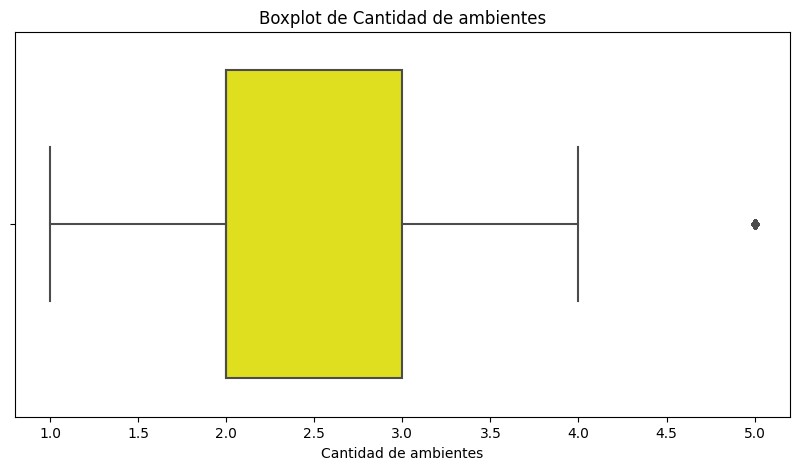

In [ ]:
plt.figure(figsize=(10,5 ))
sns.boxplot(data=df_o, x='rooms', color='yellow')
plt.xlabel('Cantidad de ambientes')
plt.title('Boxplot de Cantidad de ambientes')
plt.grid(False)
plt.show()

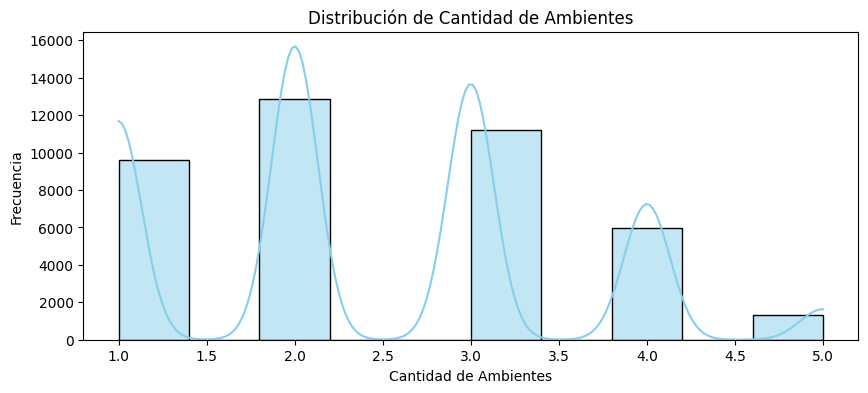

In [ ]:
# Histograma
plt.figure(figsize=(10, 4))
sns.histplot(data=df_o, x='rooms', bins=(10), kde=True, color='skyblue')
plt.xlabel('Cantidad de Ambientes')
plt.ylabel('Frecuencia')
plt.title('Distribución de Cantidad de Ambientes')
plt.grid(False)
plt.show()

**Boxplot de Habitaciones**

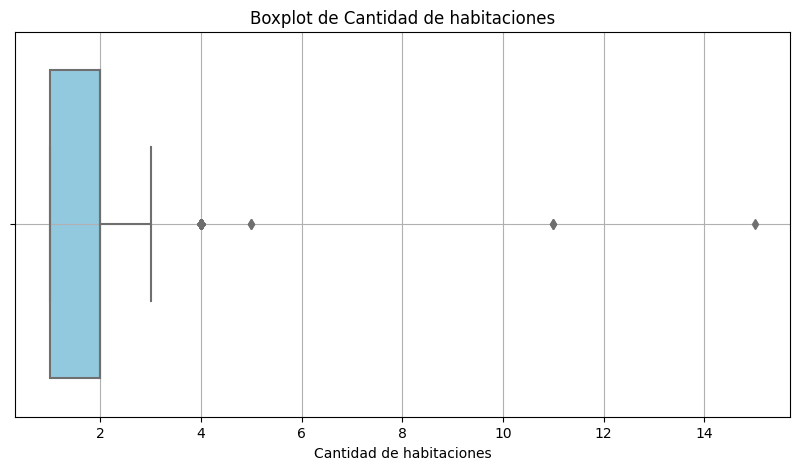

In [ ]:
plt.figure(figsize=(10,5 ))
sns.boxplot(data=df_o, x='bedrooms', color='skyblue')
plt.xlabel('Cantidad de habitaciones')
plt.title('Boxplot de Cantidad de habitaciones')
plt.grid(True)
plt.show()

**Histograma de Habitaciones**

Mediante el histograma de habitaciones podemos ver que la mayor cantidad de los departamentos poseen entre 1 y 2 habitaciones.

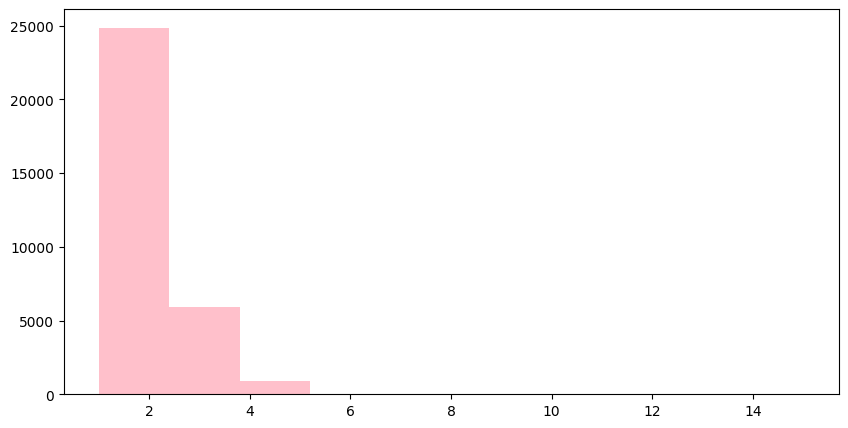

In [ ]:
ax = df_o["bedrooms"].hist(figsize=(10, 5), bins=10,color='pink'),plt.grid(False)

**Histograma del precio**

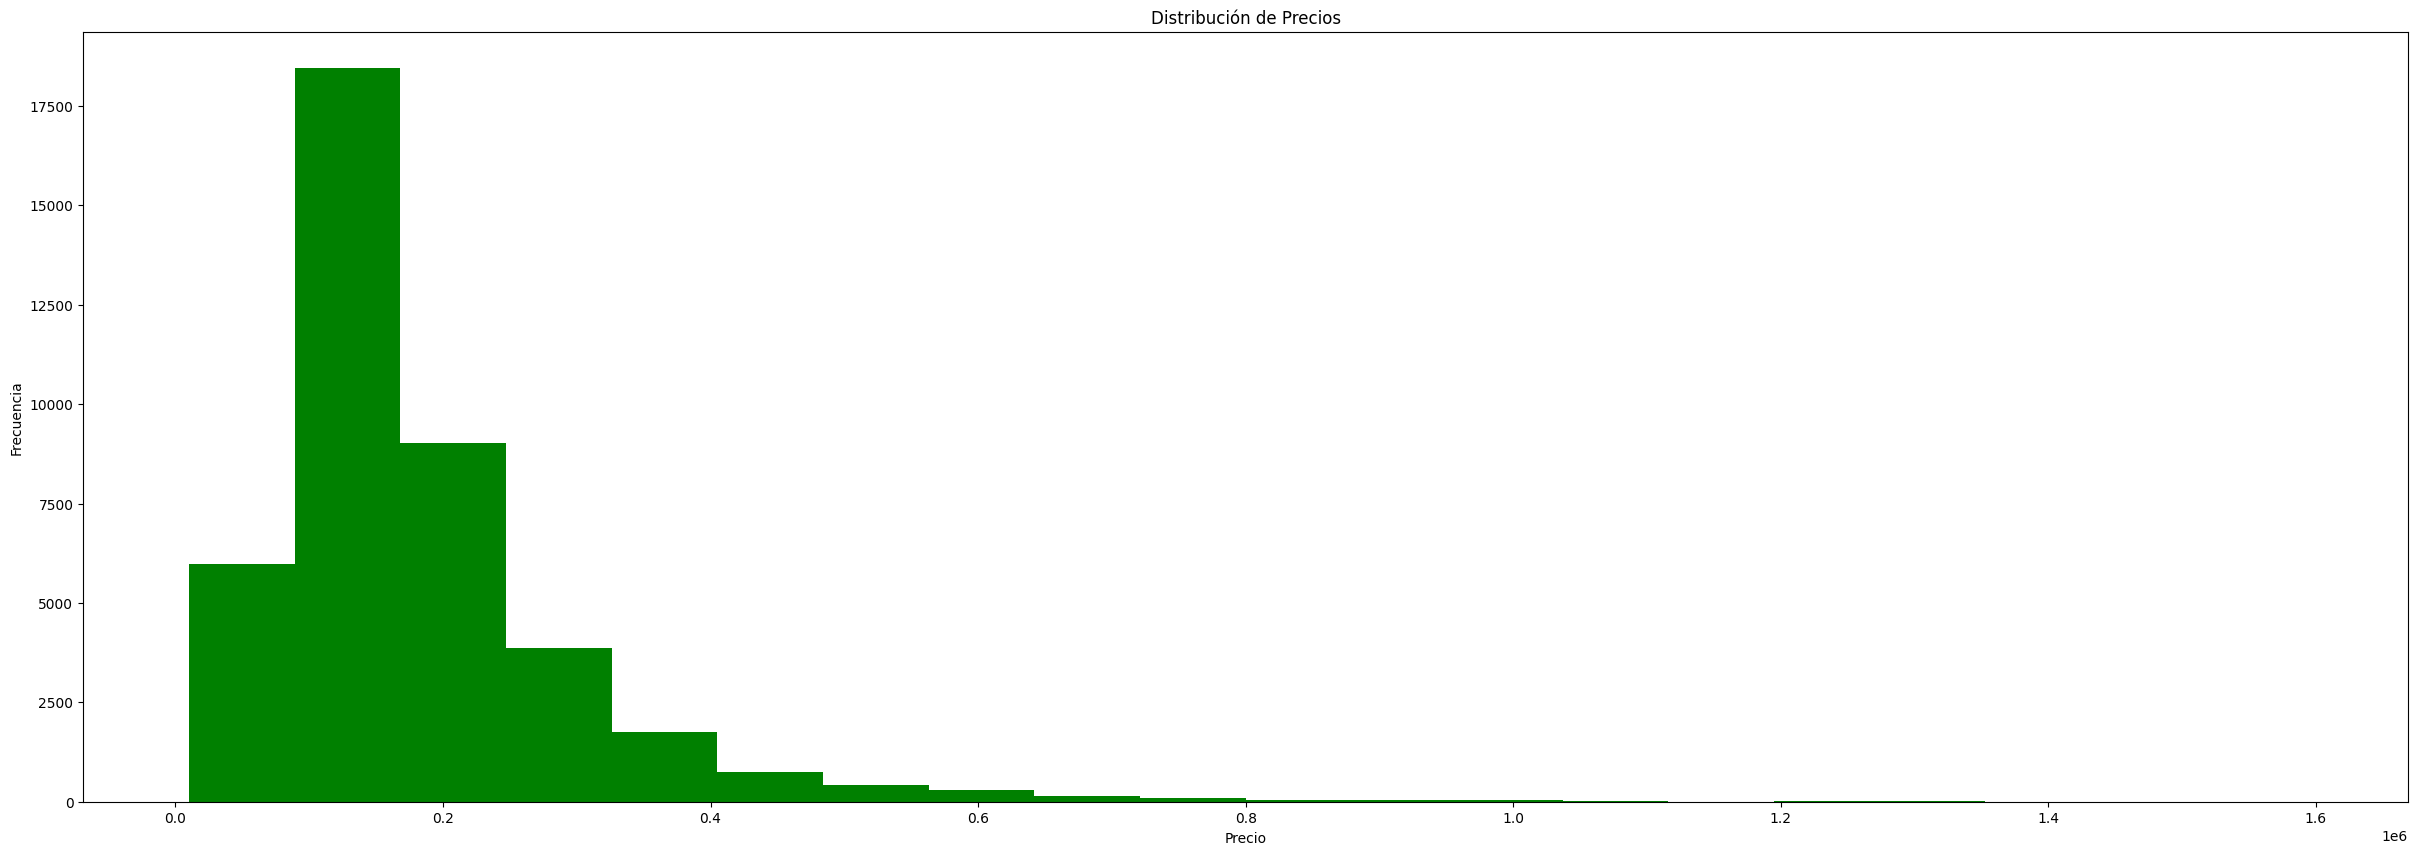

In [ ]:
df_o['price'].hist(bins=20,color='green')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.title('Distribución de Precios')
plt.show()

**Grafico de caja - surface_covered**

Boxplot antes de la limpieza de datos - podemos ver que la superficie cubierta posee muchos valores atipos, con lo cual en la sección de limpieza se procede a disminuir la cantidad de valores outliers.

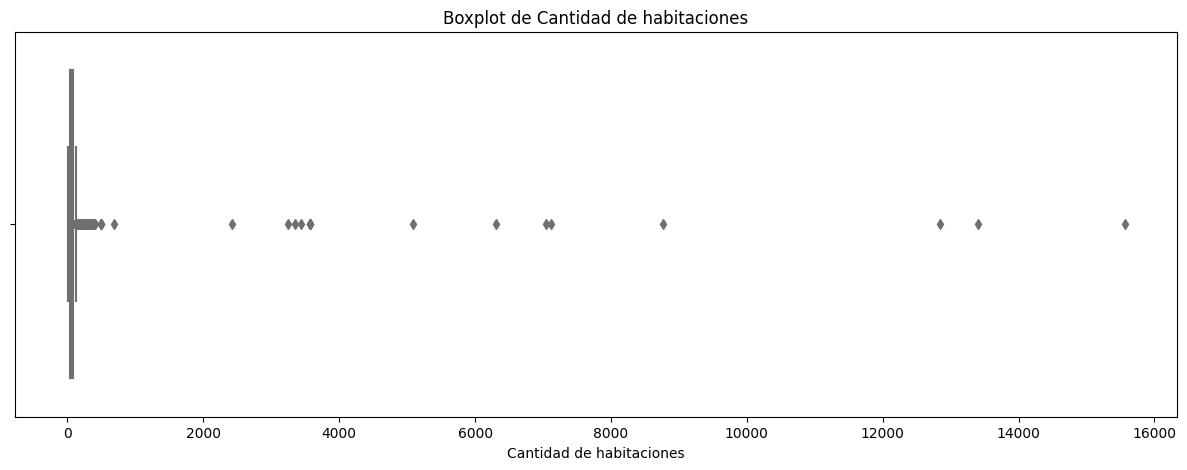

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df_o, x='surface_covered', color='skyblue')
plt.xlabel('Cantidad de habitaciones')
plt.title('Boxplot de Cantidad de habitaciones')
plt.grid(False)
plt.show()

**Histograma de Superficie cubierta**

Podemos observar que la superficie cubierta con mayor frecuencia va desde los 30 mt2 a los 50 mt2.

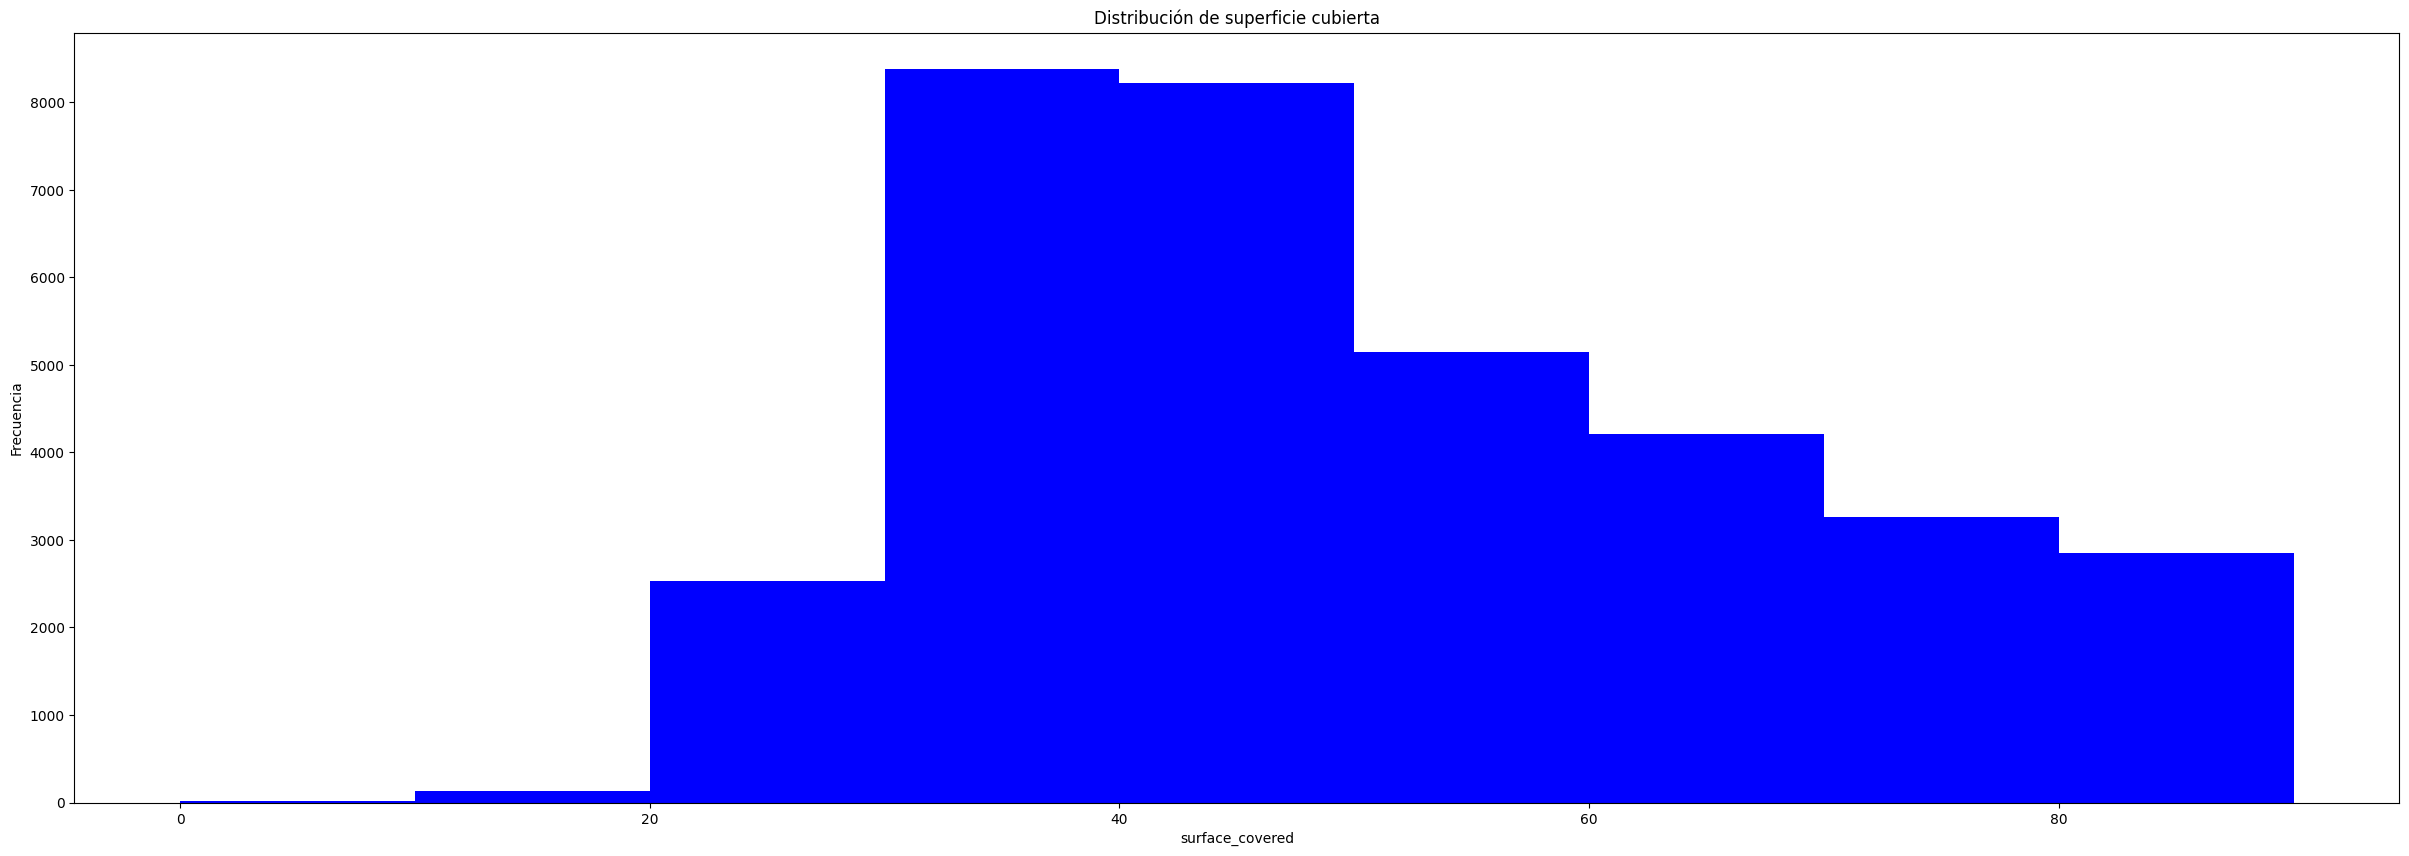

In [ ]:
df_o['surface_covered'].hist(bins=range(0,100,10),color='blue')
plt.xlabel('surface_covered')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.title('Distribución de superficie cubierta')
plt.show()

**Correlaciones entre las variables**

Analisis de correlaciones entre la variables  se arma la matriz de correlaciones y luego se realiza un grafico de correlaciones.

In [ ]:
correlation_matrix = df_analisis.corr()
correlation_matrix

,rooms,lat,lon,surface_total,surface_covered,price,bedrooms,bathrooms
rooms,1.000000,0.011628,0.001221,0.725406,0.183238,0.648230,0.932711,0.570899
lat,0.011628,1.000000,-0.207406,0.018210,0.006111,0.026456,0.016565,0.017325
lon,0.001221,-0.207406,1.000000,0.004435,-0.000588,0.021386,-0.007934,0.001348
surface_total,0.725406,0.018210,0.004435,1.000000,0.228605,0.877041,0.719588,0.686506
surface_covered,0.183238,0.006111,-0.000588,0.228605,1.000000,0.211166,0.178198,0.171675
price,0.648230,0.026456,0.021386,0.877041,0.211166,1.000000,0.626779,0.692883
bedrooms,0.932711,0.016565,-0.007934,0.719588,0.178198,0.626779,1.000000,0.589669
bathrooms,0.570899,0.017325,0.001348,0.686506,0.171675,0.692883,0.589669,1.000000


**Grafico de correlaciones**

En el grafico de correlaciones podemos observar cuales son las variables que más relación poseen con el Precio de las propiedades, en donde se puede observar una alta correlacion con la superficie cubierta, superficie total y en menor proporcion se correlaciona con Bedrooms y bathrooms


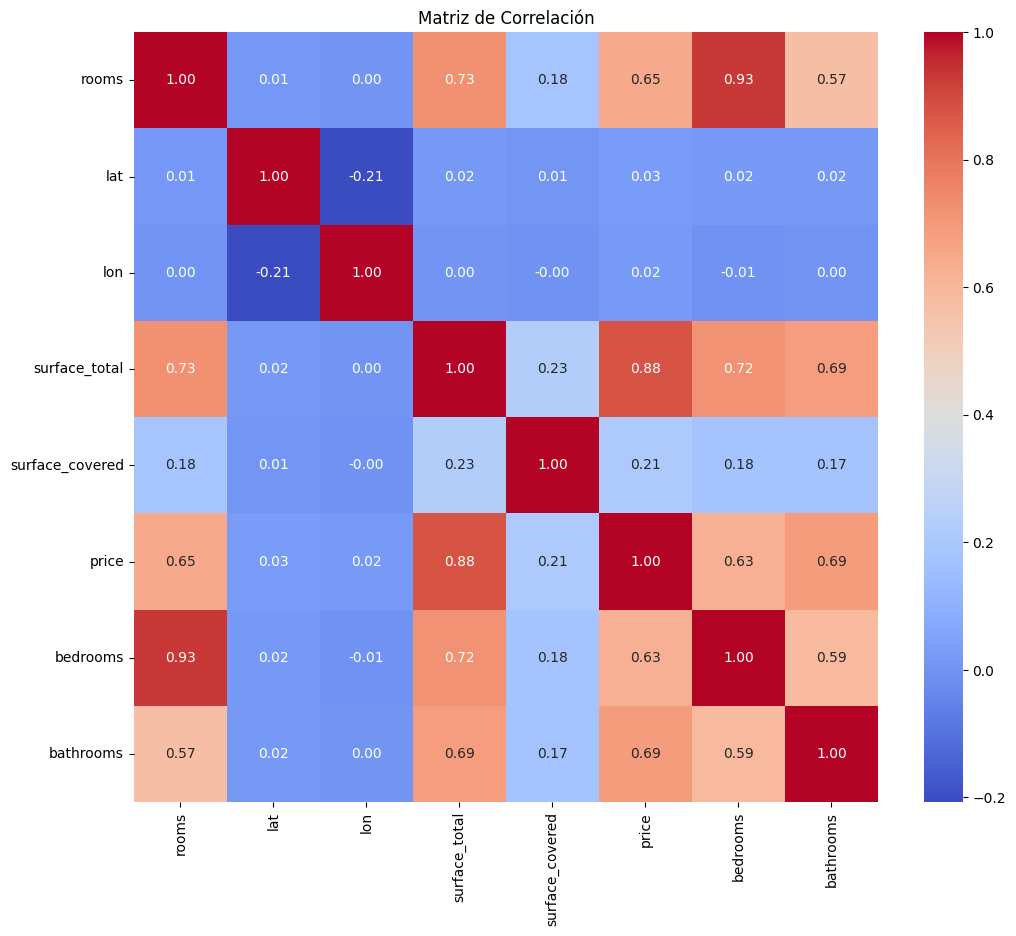

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.xticks(rotation=90)
plt.show()

**Grafico de barras - Dtos por barrios**

En el grafico de barras podemos ver cual es el barrio más predominante para la base de datos

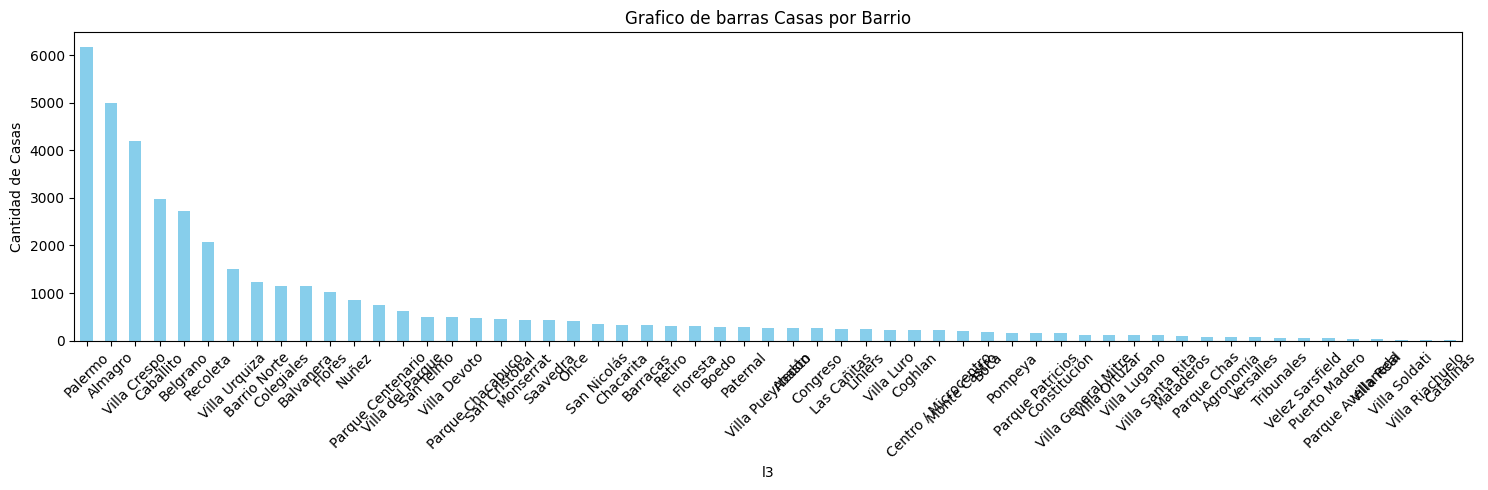

In [ ]:
cant_dtos_barrio = df_o["l3"].value_counts()
plt.figure(figsize=(15, 5))
cant_dtos_barrio.plot(kind='bar', color='skyblue')
plt.xlabel('l3')
plt.ylabel('Cantidad de Casas')
plt.title('Grafico de barras Casas por Barrio')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad

plt.tight_layout()
plt.show()

# 2.1 Preparación y limpieza de datos

Se eliminan las filas que no aportan al modelo, la fila l5, l6 y price_period tienen todas las filas nulas, es por ello que se eliminan, la fila l4 tambien se elimina ya que no aporta al modelo

In [ ]:
df = df_o.drop(['l4','l5','l6','price_period'], axis=1)

**Verificar la cantidad de nulos**

In [ ]:
df.isna().sum()

ad_type               0
start_date            0
end_date              0
created_on            0
lat                2234
lon                2234
l1                    0
l2                    0
l3                  258
rooms                 0
bedrooms           9260
bathrooms           665
surface_total         0
surface_covered     285
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

**l3: Rellenar valores faltantes por el criterio del valor mas frecuente de la variable.**

In [ ]:
df["l3"].fillna(df["l3"].mode().iloc[0], inplace = True) #rellenar los valores de l3 con la moda

**bathrooms,bedrooms,rooms,surface_covered : Imputacion con Iterative imputer**

In [ ]:
#Imputacion con Iterative imputer  (se realizó esto ya que con la limpieza anterior no me mejoraba el modelo)

imp = IterativeImputer(max_iter=10, random_state=42)

imp.fit_transform(df[["bathrooms","bedrooms","rooms","surface_covered"]])

df.loc[:, ["bathrooms","bedrooms","rooms","surface_covered"]] = imp.fit_transform(df[["bathrooms","bedrooms","rooms","surface_covered"]])

In [ ]:
df["bedrooms"]

**Lat - Lon - Imputacion por interative imputer**

In [ ]:
imp = IterativeImputer(max_iter=10, random_state=42)

imp.fit_transform(df[["lat", "lon"]])

df.loc[:, ["lat", "lon"]] = imp.fit_transform(df[["lat", "lon"]])

**Surface_covered y surface_total:**

se reemplazan los valores de la superficie cubierta mayores a la superficie total por la superficie total de la propiedad

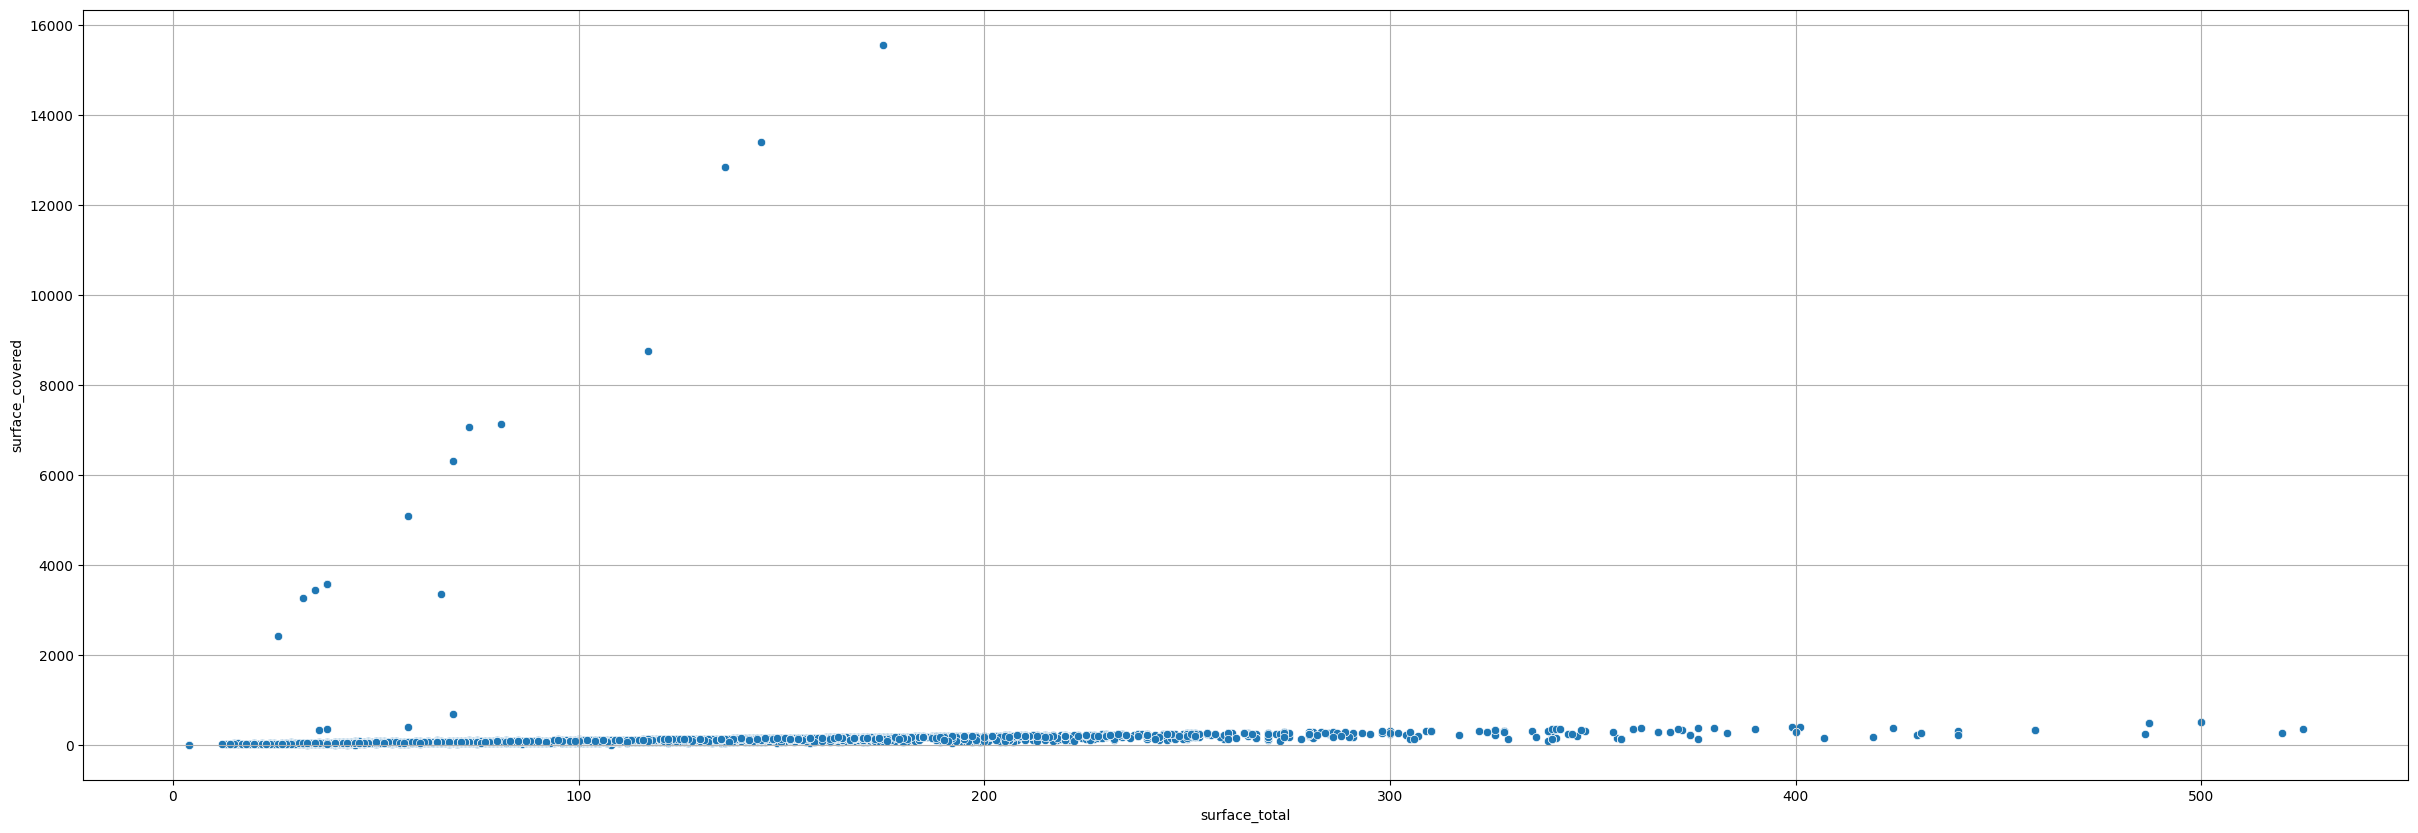

In [ ]:
sns.scatterplot(data=df, x='surface_total', y='surface_covered')
plt.grid()
plt.show()

In [ ]:
ls_sc = []

for i,j in zip(df["surface_covered"], df['surface_total']):
  if i > j:
    ls_sc.append(j)
  else:
    ls_sc.append(i)

In [ ]:
ls_st = []

for i,j in zip(df["surface_covered"], df['surface_total']):
  if j < i:
    ls_st.append(i)
  else:
    ls_st.append(j)

In [ ]:
df['surface_covered'] = ls_sc
df['surface_total'] = ls_st

In [ ]:
sup_median = df["surface_covered"].median()

Se calcula cual es el valor maximo de la variable surface_covered

In [ ]:
df["surface_covered"].max()

500.0

Se calcula cual es el valor maximo de la variable surface_total

In [ ]:
df["surface_total"].max()

15560.0

Los valores de superficie total igual a 691 se dividen por 10, ya que es un error de la bases de datos



In [ ]:
df.loc[df['surface_total'] == 691, 'surface_total'] = df.loc[df['surface_total'] == 691, 'surface_total']/10

Los valores de superficie mayores a 691 se dividen por 100, ya que es un error de la bases de datos


In [ ]:
df.loc[df['surface_total'] > 691, 'surface_total'] = df.loc[df['surface_total'] > 691, 'surface_total']/100

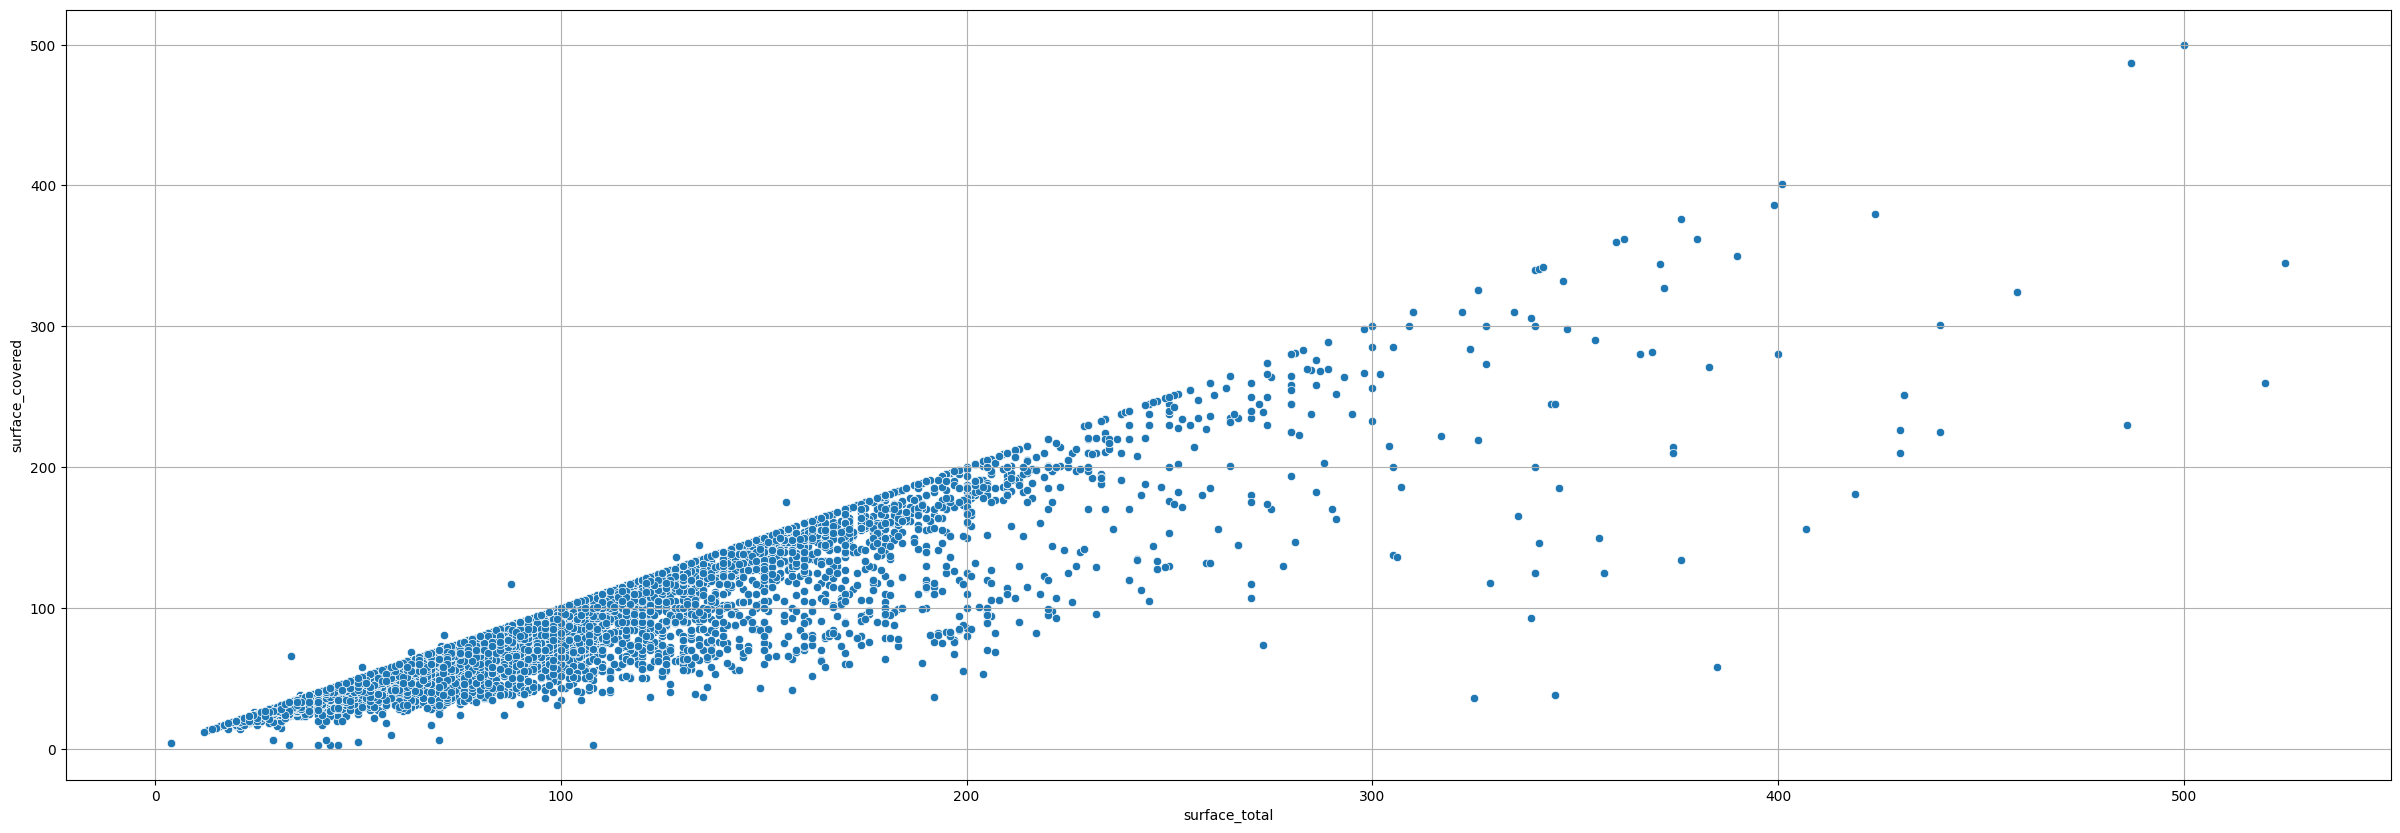

In [ ]:
sns.scatterplot(data=df, x='surface_total', y='surface_covered')
plt.grid()
plt.show()

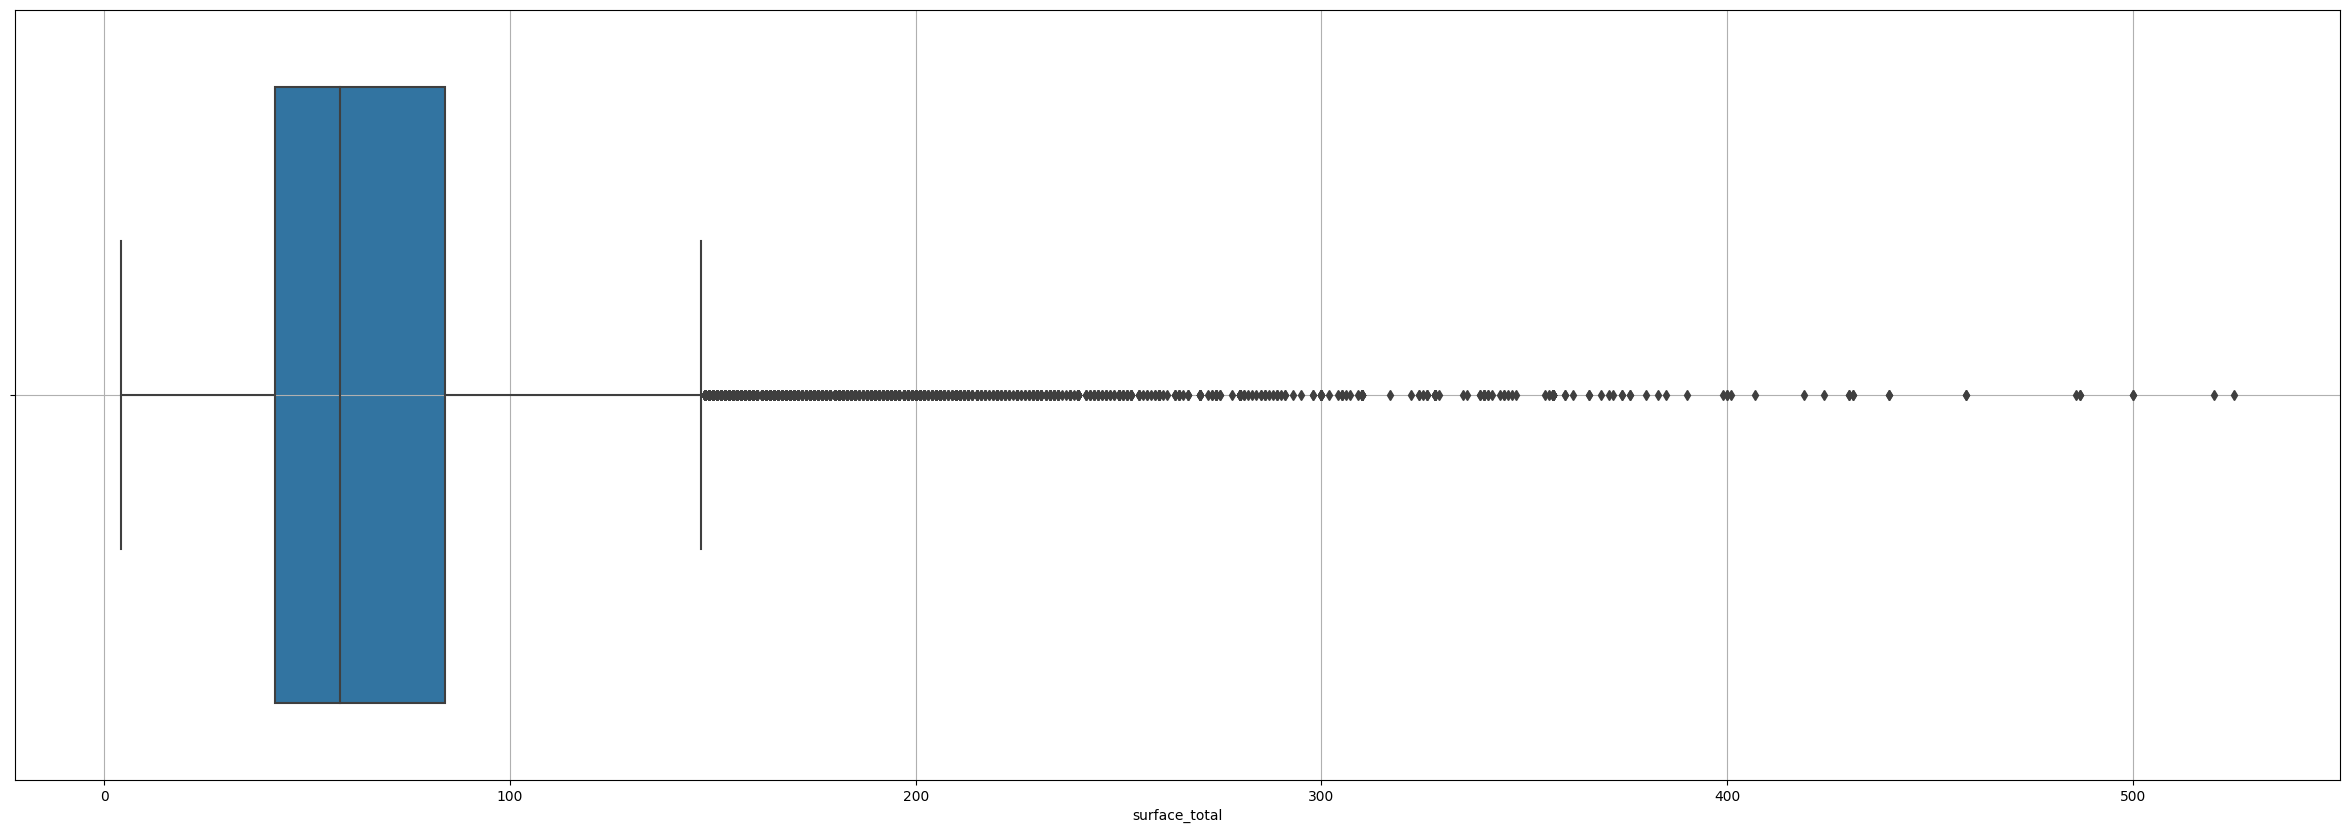

In [ ]:
sns.boxplot(data=df, x='surface_total')
plt.grid()
plt.show()

### 1.1 Text Mining

A) Jacuzzi

In [ ]:
df["jacuzzi"] = df.description.str.contains("jacuzzi") | df.description.str.contains("yacuzzi") | df.description.str.contains("yacuzi")
df["jacuzzi"] = df["jacuzzi"].astype(int)

B) Cochera

In [ ]:
df["cochera"] = df.description.str.contains("cochera") | df.description.str.contains("garage")
df["cochera"] = df["cochera"].astype(int)

C) Quincho

In [ ]:
df["quincho"] = df.description.str.contains("quincho")
df["quincho"] = df["quincho"].astype(int)

 D) Patio

In [ ]:
df["patio"] = df.description.str.contains("patio")
df["patio"] = df["patio"].astype(int)

E) Estado del Departamento/ casa

In [ ]:
df["condicion_nuevo"] = df.description.str.contains("estrenar") | df.description.str.contains("Nuevo")| df.description.str.contains("Nueva")| df.description.str.contains("nuevo")| df.description.str.contains("nueva")
df["condicion_nuevo"] = df["condicion_nuevo"].astype(int)

F) Tipo de propiedad

In [ ]:
df["tipo_propiedad"] = df.description.str.contains("Departamento") | df.description.str.contains("departamento")| df.description.str.contains("DEPARTAMENTO")| df.description.str.contains("Dpto")| df.description.str.contains("DTO")| df.description.str.contains("Dto")
df["tipo_propiedad"] = df["tipo_propiedad"].astype(int)

G) Parrilla

In [ ]:
df["Parrilla"] = df.description.str.contains("parrilla")| df.description.str.contains("PARRILLA") | df.description.str.contains("Parrilla")
df["Parrilla"] = df["Parrilla"].astype(int)

H) Pileta

In [ ]:
df["Pileta"] = df.description.str.contains("pileta") | df.description.str.contains("Pile")| df.description.str.contains("PILETA")| df.description.str.contains("Pilet")
df["Pileta"] = df["Pileta"].astype(int)

i) Apto Profesional

In [ ]:
df["apto_profesional"] = df.description.str.contains("apto profesional") | df.description.str.contains("APTO PROFESIONAL")| df.description.str.contains("apto")| df.description.str.contains("APTO") | df.description.str.contains("APTO PROF") | df.description.str.contains("APTO PROFE")| df.description.str.contains("APTO PROFESI") | df.description.str.contains("apto profesi")
df["apto_profesional"] = df["apto_profesional"].astype(int)

j) Monoambiente

In [ ]:
df["monoambiente"] = df.description.str.contains("monoambiente") | df.description.str.contains("MONOAMBIENTE")| df.description.str.contains("Monoambiente")| df.description.str.contains("Mono")| df.description.str.contains("MONO") | df.description.str.contains("MONOA")| df.description.str.contains("monoa")| df.description.str.contains("monoam")| df.description.str.contains("monoamb")| df.description.str.contains("monoambi")| df.description.str.contains("MONOAMBI")| df.description.str.contains("MONOAMBIENTE")| df.description.str.contains("MONO.")| df.description.str.contains("mono.")
df["monoambiente"] = df["monoambiente"].astype(int)

k) Amenities

In [ ]:
df["amenities"] = df.description.str.contains("amenities") | df.description.str.contains("AMENITIES")| df.description.str.contains("AMENI")| df.description.str.contains("ameni")
df["amenities"] = df["amenities"].astype(int)

l) Torreo OM - edificio con importes USD elevados

In [ ]:
df["torre_om"] = df.description.str.contains("Torre OM")
df["torre_om"] = df["torre_om"].astype(int)

m) Juegos

In [ ]:
df["juegos"] = df.description.str.contains("juegos") | df.description.str.contains("juego")| df.description.str.contains("Juegos")| df.description.str.contains("JUEGO") | df.description.str.contains("JUEGOS") | df.description.str.contains("jueg")
df["juegos"] = df["juegos"].astype(int)

n) SUM

In [ ]:
df["sum"] = df.description.str.contains("sum") | df.description.str.contains("SUM")| df.description.str.contains("Sum")
df["sum"] = df["sum"].astype(int)

ñ) Luminoso

In [ ]:
df["Luminoso"] = df.description.str.contains("luminoso") | df.description.str.contains("LUMINOSO")| df.description.str.contains("LUM")| df.description.str.contains("lumi") | df.description.str.contains("lum")
df["Luminoso"] = df["Luminoso"].astype(int)

o) Tipo Casa

In [ ]:
df["casa"] = df.description.str.contains("casas") | df.description.str.contains("casa")| df.description.str.contains("TIPO CASA")| df.description.str.contains("CASA") | df.description.str.contains("tipo casa")
df["casa"] = df["casa"].astype(int)

p) Subte

In [ ]:
df["Subte"] = df.description.str.contains("Subte") | df.description.str.contains("subte")| df.description.str.contains("SUBTE")
df["Subte"] = df["Subte"].astype(int)

q) Terraza

In [ ]:
df["terraza"] = df.description.str.contains("Terraza") | df.description.str.contains("terraza")| df.description.str.contains("TERRAZA")
df["terraza"] = df["terraza"].astype(int)

r) Gimnasio

In [ ]:
df["gimnasio"] = df.description.str.contains("Gimnasio") | df.description.str.contains("GIMNASIO")| df.description.str.contains("gimnasio")| df.description.str.contains("GYM")| df.description.str.contains("Gym") | df.description.str.contains("gym")| df.description.str.contains("gimnacio")
df["gimnasio"] = df["gimnasio"].astype(int)

s) Duplex

In [ ]:
df["duplex"] = df.description.str.contains("duplex") | df.description.str.contains("DUPLEX")| df.description.str.contains("Duplex")
df["duplex"] = df["duplex"].astype(int)

t) Baulera

In [ ]:
df["baulera"] = df.description.str.contains("baulera") | df.description.str.contains("BAULERA")| df.description.str.contains("Baulera")
df["baulera"] = df["baulera"].astype(int)

u) Espacioso

In [ ]:
df["espacioso"] = df.description.str.contains("ESPACIOSO") | df.description.str.contains("Espacioso")| df.description.str.contains("espacioso")
df["espacioso"] = df["espacioso"].astype(int)

v) Pequeño

In [ ]:
df["pequeño"] = df.description.str.contains("pequeño") | df.description.str.contains("chico")| df.description.str.contains("compacto")| df.description.str.contains("Chico")| df.description.str.contains("Pequeño")| df.description.str.contains("Compacto")| df.description.str.contains("PEQUEÑO")| df.description.str.contains("CHICO")
df["pequeño"] = df["pequeño"].astype(int)

w) Amplio

In [ ]:
df["amplio"] = df.description.str.contains("AMPLIO") | df.description.str.contains("amplio")| df.description.str.contains("amplio")| df.description.str.contains("grande")| df.description.str.contains("amplio")| df.description.str.contains("Amplio")
df["amplio"] = df["amplio"].astype(int)

x) Metrobus

In [ ]:
df["metrobus"] = df.description.str.contains("metrobus") | df.description.str.contains("Metrobus")| df.description.str.contains("METROBUS")
df["metrobus"] = df["metrobus"].astype(int)

y) Seguridad

In [ ]:
df["seguridad"] = df.description.str.contains("Seguridad") | df.description.str.contains("SEGURIDAD")| df.description.str.contains("SEGURO")| df.description.str.contains("ALARMA")| df.description.str.contains("Alarma")
df["seguridad"] = df["seguridad"].astype(int)


## 1.2 Informacion Externa





**Comunas**

In [ ]:
dfcom = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/barrios/barrios_comunas_p_Ciencia_de_Datos_y_PP.csv")

In [ ]:
indice = df.index

In [ ]:
df["l3"] = df["l3"].str.upper()

In [ ]:
df = pd.merge(df, dfcom, left_on ='l3', right_on = "BARRIO", how ='left')

In [ ]:
df.set_index(indice,inplace=True)

In [ ]:
df["COMUNA"] = df["COMUNA"].fillna(df["COMUNA"].mode().iloc[0])

In [ ]:
df = df.drop(['BARRIO'], axis=1)

**Delitos por barrio**

In [ ]:
data = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-justicia-y-seguridad/delitos/delitos_2020.csv")
delitos= data["barrio"].str.upper().value_counts()

In [ ]:
data["barrio"] = data["barrio"].str.upper()

In [ ]:
df = pd.merge(df, delitos, left_on ='l3', right_on = delitos.index, how ='left')

In [ ]:
df.rename({'barrio':'delitos'},axis = 1,inplace = True)

In [ ]:
del_min = df["delitos"].min()

In [ ]:
df["delitos"].fillna(del_min,inplace=True)

## 1.3 Incorporacion de nuevas columnas

**Superficie cubierta sobre Total**

In [ ]:
df['Por_cover'] = df['surface_covered'] / df['surface_total']

In [ ]:
df['dif_cover'] = df['surface_total'] - df['surface_covered']

**porcentaje que corresponde a baños sobre cantidad de ambientes**

In [ ]:
df['porc_baños'] = df['bathrooms'] / df['rooms']

**porcentaje que corresponde a habitaciones sobre cantidad de ambientes**


In [ ]:
df['porc_habitaciones'] = df['bedrooms'] / df['rooms']

## 1.4 Variables Dummies

A) Por Barrio

In [ ]:
dummies = pd.get_dummies(df.l3)


In [ ]:
df = pd.concat([
    df.drop("l3", axis = 1),
    dummies
], axis = 1)
df.head()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,rooms,bedrooms,...,VILLA GENERAL MITRE,VILLA LUGANO,VILLA LURO,VILLA ORTUZAR,VILLA PUEYRREDÓN,VILLA REAL,VILLA RIACHUELO,VILLA SANTA RITA,VILLA SOLDATI,VILLA URQUIZA
0,Propiedad,2019-10-12,2019-10-16,2019-10-12,-58.421491,-34.605587,Argentina,Capital Federal,3.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,Propiedad,2019-10-13,2020-01-21,2019-10-13,-58.513908,-34.622557,Argentina,Capital Federal,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,Propiedad,2020-03-28,2020-08-17,2020-03-28,-58.437803,-34.601369,Argentina,Capital Federal,3.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,Propiedad,2019-10-18,2019-11-02,2019-10-18,-58.428966,-34.604013,Argentina,Capital Federal,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,Propiedad,2019-07-08,2019-09-14,2019-07-08,-58.497026,-34.644835,Argentina,Capital Federal,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.drop(['VILLA RIACHUELO','VILLA SOLDATI'], axis=1, inplace = True)

B) Rangos Superficie

Se crea una dummies por rango de superficies - sup chica, sup mediana, sup grande y sup muy grande - agrupandolo por quartiles

In [ ]:
df['rangos_sup'] = pd.qcut(df['surface_total'],q=np.arange(0, 1.01, 0.25),
                           labels=['sup_chica','sup_mediana','sup_grande','sup_muy_grande'])

dummies_B = pd.get_dummies(df['rangos_sup'])

df = pd.concat([
    df.drop("rangos_sup", axis = 1),
    dummies_B
], axis = 1)
df.head()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,rooms,bedrooms,...,VILLA LURO,VILLA ORTUZAR,VILLA PUEYRREDÓN,VILLA REAL,VILLA SANTA RITA,VILLA URQUIZA,sup_chica,sup_mediana,sup_grande,sup_muy_grande
0,Propiedad,2019-10-12,2019-10-16,2019-10-12,-58.421491,-34.605587,Argentina,Capital Federal,3.0,2.0,...,0,0,0,0,0,0,0,0,1,0
1,Propiedad,2019-10-13,2020-01-21,2019-10-13,-58.513908,-34.622557,Argentina,Capital Federal,2.0,1.0,...,0,0,0,0,0,0,1,0,0,0
2,Propiedad,2020-03-28,2020-08-17,2020-03-28,-58.437803,-34.601369,Argentina,Capital Federal,3.0,2.0,...,0,0,0,0,0,0,0,1,0,0
3,Propiedad,2019-10-18,2019-11-02,2019-10-18,-58.428966,-34.604013,Argentina,Capital Federal,2.0,1.0,...,0,0,0,0,0,0,1,0,0,0
4,Propiedad,2019-07-08,2019-09-14,2019-07-08,-58.497026,-34.644835,Argentina,Capital Federal,2.0,1.0,...,0,0,0,0,0,0,0,1,0,0


## 1.5 Cluster

Se crea un cluster por superficie total

In [ ]:
scaler = StandardScaler()
df['superficie'] = scaler.fit_transform(df[['surface_total']])

In [ ]:
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster_sup'] = kmeans.fit_predict(df[['superficie']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Excluir las variables objets**

In [ ]:
# me quedo con los campos numéricos
df = df.select_dtypes(exclude=["object"])
titulos = df.columns

In [ ]:
df.head()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,jacuzzi,cochera,...,VILLA PUEYRREDÓN,VILLA REAL,VILLA SANTA RITA,VILLA URQUIZA,sup_chica,sup_mediana,sup_grande,sup_muy_grande,superficie,cluster_sup
0,-58.421491,-34.605587,3.0,2.0,1.0,67.0,63.0,200000.0,0,0,...,0,0,0,0,0,0,1,0,-0.072122,5
1,-58.513908,-34.622557,2.0,1.0,1.0,39.0,39.0,106000.0,0,0,...,0,0,0,0,1,0,0,0,-0.734905,1
2,-58.437803,-34.601369,3.0,2.0,1.0,50.0,48.0,129900.0,0,0,...,0,0,0,0,0,1,0,0,-0.474526,5
3,-58.428966,-34.604013,2.0,1.0,1.0,37.0,33.0,92000.0,0,0,...,0,0,0,0,1,0,0,0,-0.782247,1
4,-58.497026,-34.644835,2.0,1.0,1.0,43.0,40.0,87000.0,0,0,...,0,0,0,0,0,1,0,0,-0.640222,1


# 3.1. Creacion y Evaluacion del Modelo

In [ ]:
##Optimizacion con HalvingGridSearchCV

# %%time

# X = df[df.columns.drop("price")]
# y = df["price"]

# reg = GradientBoostingRegressor(random_state = 42)

# param_grid = {"n_estimators": [1000]}

# search = HalvingGridSearchCV(reg, param_grid, resource='max_depth', max_resources=10, random_state=42, scoring = 'neg_root_mean_squared_error').fit(X, y)
# search.best_params_

In [ ]:
# search.score(X, y)

In [ ]:
X = df[df.columns.drop("price")]
y = df["price"]

reg = GradientBoostingRegressor(random_state = 42,n_estimators = 1000, max_depth = 10)

# 4.1. Archivo para entrega (en Kaggle)

In [ ]:
df_ap = pd.read_csv("/content/sample_data/a_predecir.csv.zip", index_col="id")
df_ap.head()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
id,,,,,,,,,,,,,,,,,,,,,
291,Propiedad,2019-07-07,2019-07-09,2019-07-07,-58.423990,-34.589190,Argentina,Capital Federal,Palermo,NaN,...,1.0,42.0,42.0,NaN,USD,NaN,Departamento de 2 ambientes en Venta en Palermo,"Excelente departamento de dos ambientes, segun...",Departamento,Venta
638,Propiedad,2019-07-07,2019-07-09,2019-07-07,-58.396664,-34.592536,Argentina,Capital Federal,Recoleta,NaN,...,2.0,167.0,161.0,NaN,USD,NaN,Venta - Junin 1300,Semipiso. Living. Comedor. 3 dormitorio(s). 2 ...,Departamento,Venta
1245,Propiedad,2020-06-21,2020-06-27,2020-06-21,-58.414015,-34.604186,Argentina,Capital Federal,Almagro,NaN,...,1.0,43.0,39.0,NaN,USD,NaN,Departamento de 1 ambiente en Venta en Almagro,"1 ambiente al frente con balcon!, 42 m2 totale...",Departamento,Venta
1267,Propiedad,2020-06-21,2020-06-27,2020-06-21,-58.453318,-34.650948,Argentina,Capital Federal,Balvanera,NaN,...,1.0,39.0,36.0,NaN,USD,NaN,Moreno 2900,Viva en un monoambiente con amenities de una t...,Departamento,Venta
1272,Propiedad,2020-06-21,2020-06-27,2020-06-21,-58.453318,-34.650948,Argentina,Capital Federal,Balvanera,NaN,...,1.0,30.0,28.0,NaN,USD,NaN,Moreno 2900,Trabaje en un monoambiente con amenities de un...,Departamento,Venta


### 1.1 Preparacion y limpieza de datos

In [ ]:
df_ap = df_ap.drop(['l4','l5','l6','price_period'], axis=1)

In [ ]:
df_ap.isna().sum()

ad_type               0
start_date            0
end_date              0
created_on            0
lat                 232
lon                 232
l1                    0
l2                    0
l3                   29
rooms                 0
bedrooms           1044
bathrooms            57
surface_total         0
surface_covered      34
price              4551
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

In [ ]:
df_ap.head()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
id,,,,,,,,,,,,,,,,,,,,
291,Propiedad,2019-07-07,2019-07-09,2019-07-07,-58.423990,-34.589190,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,42.0,42.0,NaN,USD,Departamento de 2 ambientes en Venta en Palermo,"Excelente departamento de dos ambientes, segun...",Departamento,Venta
638,Propiedad,2019-07-07,2019-07-09,2019-07-07,-58.396664,-34.592536,Argentina,Capital Federal,Recoleta,4.0,3.0,2.0,167.0,161.0,NaN,USD,Venta - Junin 1300,Semipiso. Living. Comedor. 3 dormitorio(s). 2 ...,Departamento,Venta
1245,Propiedad,2020-06-21,2020-06-27,2020-06-21,-58.414015,-34.604186,Argentina,Capital Federal,Almagro,1.0,NaN,1.0,43.0,39.0,NaN,USD,Departamento de 1 ambiente en Venta en Almagro,"1 ambiente al frente con balcon!, 42 m2 totale...",Departamento,Venta
1267,Propiedad,2020-06-21,2020-06-27,2020-06-21,-58.453318,-34.650948,Argentina,Capital Federal,Balvanera,1.0,NaN,1.0,39.0,36.0,NaN,USD,Moreno 2900,Viva en un monoambiente con amenities de una t...,Departamento,Venta
1272,Propiedad,2020-06-21,2020-06-27,2020-06-21,-58.453318,-34.650948,Argentina,Capital Federal,Balvanera,1.0,NaN,1.0,30.0,28.0,NaN,USD,Moreno 2900,Trabaje en un monoambiente con amenities de un...,Departamento,Venta


**l3 - Limpieza de l3 con la moda**

In [ ]:
df_ap["l3"] = df_ap["l3"].fillna(df_ap["l3"].mode()[0]) #rellenar los valores de l3 con la moda

**bathrooms,bedrooms,rooms,surface_covered : Imputacion con Iterative imputer**

In [ ]:
imp.fit_transform(df_ap[["bathrooms","bedrooms","rooms","surface_covered"]])

df_ap.loc[:, ["bathrooms","bedrooms","rooms","surface_covered"]] = imp.fit_transform(df_ap[["bathrooms","bedrooms","rooms","surface_covered"]])

**Lat - Lon - Imputacion por interative imputer**

In [ ]:
imp.fit_transform(df_ap[["lat", "lon"]])

df_ap.loc[:, ["lat", "lon"]] = imp.fit_transform(df_ap[["lat", "lon"]])

**Surface_covered y surface_total:**


In [ ]:
ls_sc_ap = []

for i,j in zip(df_ap["surface_covered"], df_ap['surface_total']):
  if i > j:
    ls_sc_ap.append(j)
  else:
    ls_sc_ap.append(i)

In [ ]:
ls_st_ap = []

for i,j in zip(df_ap["surface_covered"], df_ap['surface_total']):
  if j < i:
    ls_st_ap.append(i)
  else:
    ls_st_ap.append(j)

In [ ]:
df_ap['surface_covered'] = ls_sc_ap
df_ap['surface_total'] = ls_st_ap

In [ ]:
df_ap.loc[df_ap['surface_total'] > 4800, 'surface_total'] = df_ap.loc[df_ap['surface_total'] > 4800, 'surface_total']/100

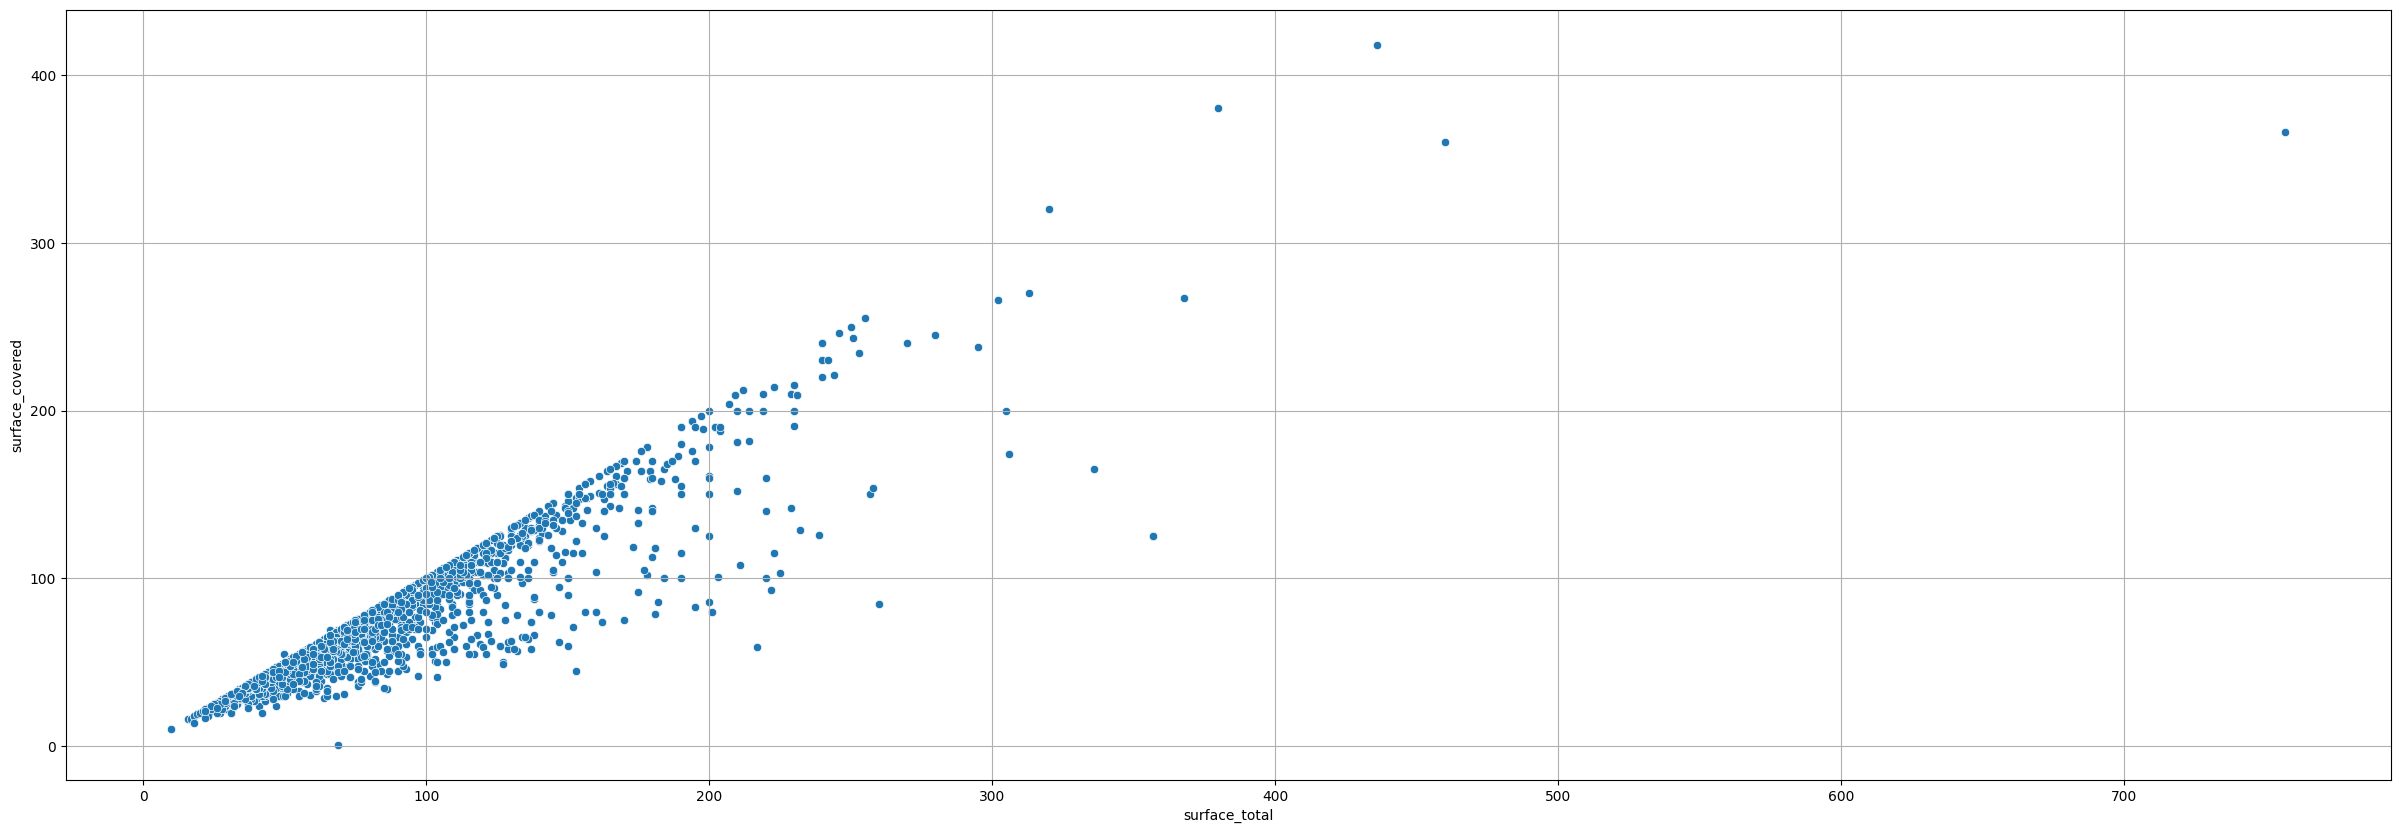

In [ ]:
sns.scatterplot(data=df_ap, x='surface_total', y='surface_covered')
plt.grid()
plt.show()

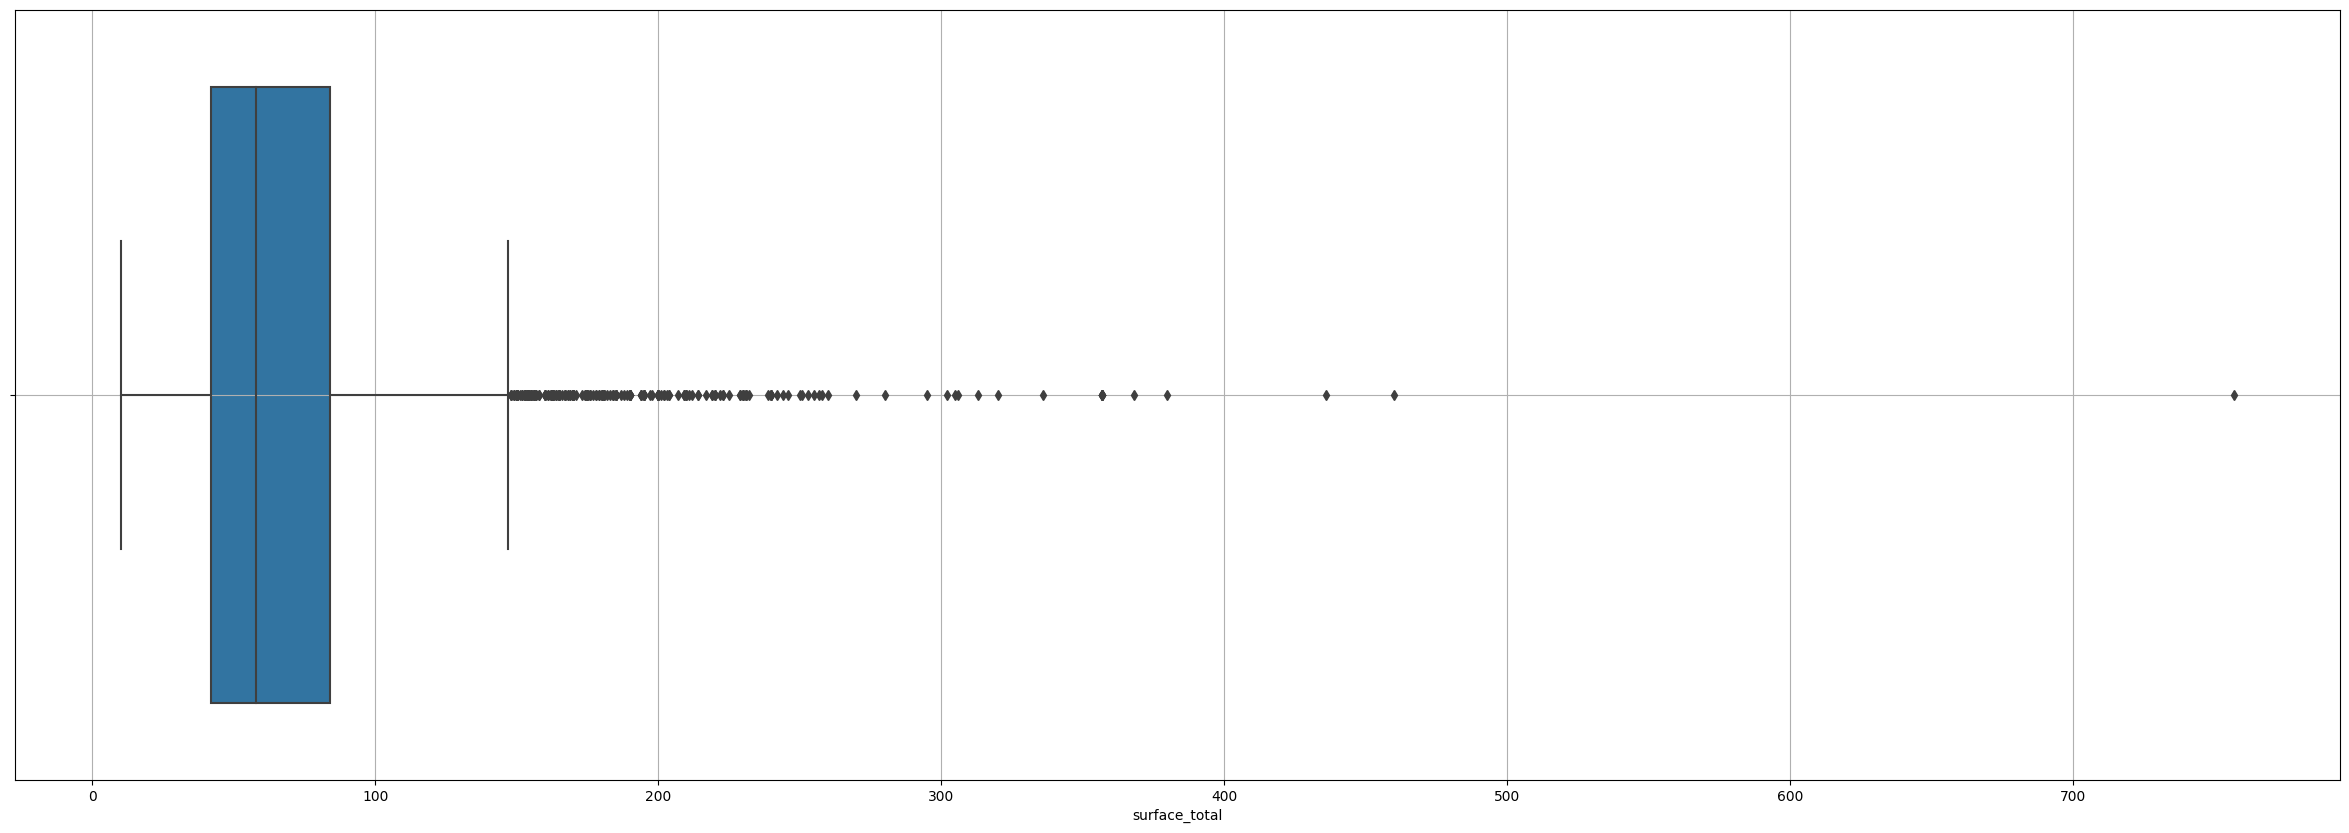

In [ ]:
sns.boxplot(data=df_ap, x='surface_total')
plt.grid()
plt.show()

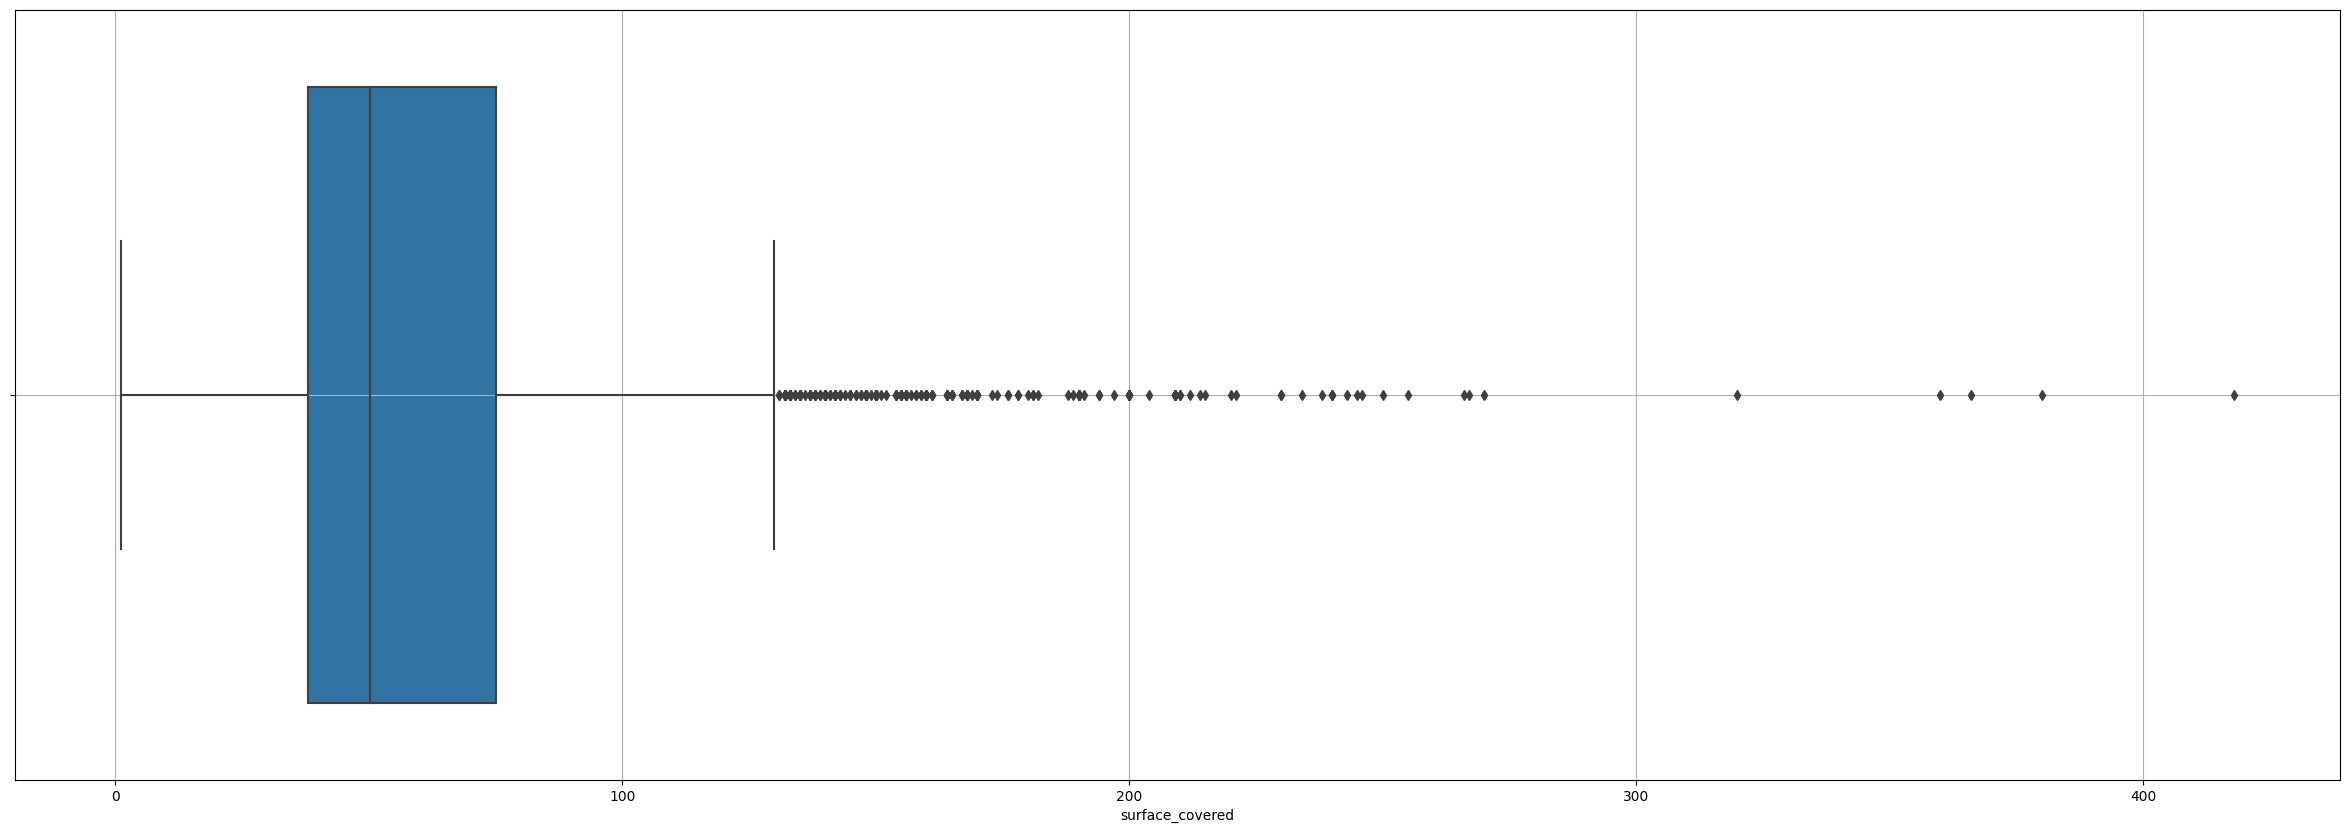

In [ ]:
sns.boxplot(data=df_ap, x='surface_covered')
plt.grid()
plt.show()

In [ ]:
df_ap.isna().sum()

ad_type               0
start_date            0
end_date              0
created_on            0
lat                   0
lon                   0
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered       0
price              4551
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

### 1.1 Text Mining

A) Jacuzzi

In [ ]:
df_ap["jacuzzi"] = df_ap.description.str.contains("jacuzzi") | df_ap.description.str.contains("yacuzzi") | df_ap.description.str.contains("yacuzi")
df_ap["jacuzzi"] = df_ap["jacuzzi"].astype(int)

B) Cochera

In [ ]:
df_ap["cochera"] = df_ap.description.str.contains("cochera") | df_ap.description.str.contains("garage")
df_ap["cochera"] = df_ap["cochera"].astype(int)

C) Quicho

In [ ]:
df_ap["quincho"] = df_ap.description.str.contains("quincho")
df_ap["quincho"] = df_ap["quincho"].astype(int)

D) Patio

In [ ]:
df_ap["patio"] = df_ap.description.str.contains("patio")
df_ap["patio"] = df_ap["patio"].astype(int)

E) Estado del Departamento/ casa

In [ ]:
df_ap["condicion_nuevo"] = df_ap.description.str.contains("estrenar") | df_ap.description.str.contains("Nuevo")| df_ap.description.str.contains("Nueva")| df_ap.description.str.contains("nuevo")| df_ap.description.str.contains("nueva")
df_ap["condicion_nuevo"] = df_ap["condicion_nuevo"].astype(int)

F) Tipo de propiedad

In [ ]:
df_ap["tipo_propiedad"] = df_ap.description.str.contains("Departamento") | df_ap.description.str.contains("departamento")| df_ap.description.str.contains("DEPARTAMENTO")| df_ap.description.str.contains("Dpto")| df_ap.description.str.contains("DTO")| df_ap.description.str.contains("Dto")
df_ap["tipo_propiedad"] = df_ap["tipo_propiedad"].astype(int)

H) Parrilla

In [ ]:
df_ap["Parrilla"] = df_ap.description.str.contains("parrilla")| df_ap.description.str.contains("PARRILLA") | df_ap.description.str.contains("Parrilla")
df["Parrilla"] = df["Parrilla"].astype(int)

G) Pileta

In [ ]:
df_ap["Pileta"] = df_ap.description.str.contains("pileta") | df_ap.description.str.contains("Pile")| df_ap.description.str.contains("PILETA")| df_ap.description.str.contains("Pilet")
df_ap["Pileta"] = df_ap["Pileta"].astype(int)

H) Apto profesional

In [ ]:
df_ap["apto_profesional"] = df_ap.description.str.contains("apto profesional") | df_ap.description.str.contains("APTO PROFESIONAL")| df_ap.description.str.contains("apto")| df_ap.description.str.contains("APTO") | df_ap.description.str.contains("APTO PROF") | df_ap.description.str.contains("APTO PROFE")| df_ap.description.str.contains("APTO PROFESI") | df_ap.description.str.contains("apto profesi")
df_ap["apto_profesional"] = df_ap["apto_profesional"].astype(int)

i) Monoambiente

In [ ]:
df_ap["monoambiente"] = df_ap.description.str.contains("monoambiente") | df_ap.description.str.contains("MONOAMBIENTE")| df_ap.description.str.contains("Monoambiente")| df_ap.description.str.contains("Mono")| df_ap.description.str.contains("MONO") | df_ap.description.str.contains("MONOA")| df_ap.description.str.contains("monoa")| df_ap.description.str.contains("monoam")| df_ap.description.str.contains("monoamb")| df_ap.description.str.contains("monoambi")| df_ap.description.str.contains("MONOAMBI")| df_ap.description.str.contains("MONOAMBIENTE")| df_ap.description.str.contains("MONO.")| df_ap.description.str.contains("mono.")
df_ap["monoambiente"] = df_ap["monoambiente"].astype(int)

j) Amenities

In [ ]:
df_ap["amenities"] = df_ap.description.str.contains("amenities") | df_ap.description.str.contains("AMENITIES")| df_ap.description.str.contains("AMENI")| df_ap.description.str.contains("ameni")
df_ap["amenities"] = df_ap["amenities"].astype(int)

k) Torreo OM - edificio

In [ ]:
df_ap["torre_om"] = df_ap.description.str.contains("Torre OM")
df_ap["torre_om"] = df_ap["torre_om"].astype(int)

l) Juegos

In [ ]:
df_ap["juegos"] = df_ap.description.str.contains("juegos") | df_ap.description.str.contains("juego")| df_ap.description.str.contains("Juegos")| df_ap.description.str.contains("JUEGO") | df_ap.description.str.contains("JUEGOS") | df_ap.description.str.contains("jueg")
df_ap["juegos"] = df_ap["juegos"].astype(int)

m) SUM

In [ ]:
df_ap["sum"] = df_ap.description.str.contains("sum") | df_ap.description.str.contains("SUM")| df_ap.description.str.contains("Sum")
df_ap["sum"] = df_ap["sum"].astype(int)

n) Luminoso

In [ ]:
df_ap["Luminoso"] = df_ap.description.str.contains("luminoso") | df_ap.description.str.contains("LUMINOSO")| df_ap.description.str.contains("LUM")| df_ap.description.str.contains("lumi") | df_ap.description.str.contains("lum")
df_ap["Luminoso"] = df_ap["Luminoso"].astype(int)

o) Tipo CASA

In [ ]:
df_ap["casa"] = df_ap.description.str.contains("casas") | df_ap.description.str.contains("casa")| df_ap.description.str.contains("TIPO CASA")| df_ap.description.str.contains("CASA") | df_ap.description.str.contains("tipo casa")
df_ap["casa"] = df_ap["casa"].astype(int)

p) Subte

In [ ]:
df_ap["Subte"] = df_ap.description.str.contains("Subte") | df_ap.description.str.contains("subte")| df_ap.description.str.contains("SUBTE")
df_ap["Subte"] = df_ap["Subte"].astype(int)

q) Terraza

In [ ]:
df_ap["terraza"] = df_ap.description.str.contains("Terraza") | df_ap.description.str.contains("terraza")| df_ap.description.str.contains("TERRAZA")
df_ap["terraza"] = df_ap["terraza"].astype(int)

r) Gimnasio

In [ ]:
df_ap["gimnasio"] = df_ap.description.str.contains("Gimnasio") | df_ap.description.str.contains("GIMNASIO")| df_ap.description.str.contains("gimnasio")| df_ap.description.str.contains("GYM")| df_ap.description.str.contains("Gym") | df_ap.description.str.contains("gym")| df_ap.description.str.contains("gimnacio")
df_ap["gimnasio"] = df_ap["gimnasio"].astype(int)

s) Duplex

In [ ]:
df_ap["duplex"] = df_ap.description.str.contains("duplex") | df_ap.description.str.contains("DUPLEX")| df_ap.description.str.contains("Duplex")
df_ap["duplex"] = df_ap["duplex"].astype(int)

t) Baulera

In [ ]:
df_ap["baulera"] = df_ap.description.str.contains("baulera") | df_ap.description.str.contains("BAULERA")| df_ap.description.str.contains("Baulera")
df_ap["baulera"] = df_ap["baulera"].astype(int)

u) Espacioso

In [ ]:
df_ap["espacioso"] = df_ap.description.str.contains("ESPACIOSO") | df_ap.description.str.contains("Espacioso")| df_ap.description.str.contains("espacioso")
df_ap["espacioso"] = df_ap["espacioso"].astype(int)

v) Pequeño - chico

In [ ]:
df_ap["pequeño"] = df_ap.description.str.contains("pequeño") | df_ap.description.str.contains("chico")| df_ap.description.str.contains("compacto")| df_ap.description.str.contains("Chico")| df_ap.description.str.contains("Pequeño")| df_ap.description.str.contains("Compacto")
df_ap["pequeño"] = df_ap["pequeño"].astype(int)

w) Grande

In [ ]:
df_ap["amplio"] = df_ap.description.str.contains("pequeño") | df_ap.description.str.contains("amplio")| df_ap.description.str.contains("amplio")| df_ap.description.str.contains("grande")| df_ap.description.str.contains("amplio")| df_ap.description.str.contains("Amplio")
df_ap["amplio"] = df_ap["amplio"].astype(int)

x) Metrobus

In [ ]:
df_ap["metrobus"] = df_ap.description.str.contains("metrobus") | df_ap.description.str.contains("Metrobus")| df_ap.description.str.contains("METROBUS")
df_ap["metrobus"] = df_ap["metrobus"].astype(int)

y) Seguridad

In [ ]:
df_ap["seguridad"] = df_ap.description.str.contains("Seguridad") | df_ap.description.str.contains("SEGURIDAD")| df_ap.description.str.contains("SEGURO")| df_ap.description.str.contains("ALARMA")| df_ap.description.str.contains("Alarma")
df_ap["seguridad"] = df_ap["seguridad"].astype(int)

### 1.2 Informacion Externa

**Comunas**

In [ ]:
df_ap["l3"] = df_ap["l3"].str.upper()

In [ ]:
indice = df_ap.index

In [ ]:
df_ap = pd.merge(df_ap, dfcom, left_on ='l3', right_on = "BARRIO", how ='left')

In [ ]:
df_ap.set_index(indice,inplace=True)

In [ ]:
df_ap["COMUNA"] = df_ap["COMUNA"].fillna(df_ap["COMUNA"].mode().iloc[0])

In [ ]:
df_ap = df_ap.drop(['BARRIO'], axis=1)

**Delitos por barrios**

In [ ]:
indice = df_ap.index

In [ ]:
df_ap = pd.merge(df_ap, delitos, left_on ='l3', right_on = delitos.index, how = 'left')

In [ ]:
df_ap.set_index(indice,inplace=True)

In [ ]:
df_ap.rename({'barrio':'delitos'},axis = 1,inplace = True)

In [ ]:
df_ap ["delitos"] = df_ap["delitos"].fillna(df_ap["delitos"].min())

### 1.3 Incorporación de nuevas columnas

**Superficie cubierta sobre total**

In [ ]:
df_ap['Por_cover'] = df_ap['surface_covered'] / df_ap['surface_total']

In [ ]:
df_ap['dif_cover'] = df_ap['surface_total'] - df_ap['surface_covered']

**Porcentaje de baños por ambientes**

In [ ]:
df_ap['porc_baños'] = df_ap['bathrooms'] / df_ap['rooms']

In [ ]:
df_ap['porc_habitaciones'] = df_ap['bedrooms'] / df_ap['rooms']




### 1.4 Variables Dummies

**A) Por Barrio**

In [ ]:
dummies_ap = pd.get_dummies(df_ap.l3)

In [ ]:
# dummies_ap.head()

In [ ]:
# df_ap.isna().sum()

In [ ]:
df_ap = pd.concat([
    df_ap.drop("l3", axis = 1),
    dummies_ap
], axis = 1)
df_ap.head()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,rooms,bedrooms,...,VILLA DEL PARQUE,VILLA DEVOTO,VILLA GENERAL MITRE,VILLA LUGANO,VILLA LURO,VILLA ORTUZAR,VILLA PUEYRREDÓN,VILLA REAL,VILLA SANTA RITA,VILLA URQUIZA
id,,,,,,,,,,,,,,,,,,,,,
291,Propiedad,2019-07-07,2019-07-09,2019-07-07,-58.423990,-34.589190,Argentina,Capital Federal,2.0,1.000000,...,0,0,0,0,0,0,0,0,0,0
638,Propiedad,2019-07-07,2019-07-09,2019-07-07,-58.396664,-34.592536,Argentina,Capital Federal,4.0,3.000000,...,0,0,0,0,0,0,0,0,0,0
1245,Propiedad,2020-06-21,2020-06-27,2020-06-21,-58.414015,-34.604186,Argentina,Capital Federal,1.0,0.437486,...,0,0,0,0,0,0,0,0,0,0
1267,Propiedad,2020-06-21,2020-06-27,2020-06-21,-58.453318,-34.650948,Argentina,Capital Federal,1.0,0.437340,...,0,0,0,0,0,0,0,0,0,0
1272,Propiedad,2020-06-21,2020-06-27,2020-06-21,-58.453318,-34.650948,Argentina,Capital Federal,1.0,0.436949,...,0,0,0,0,0,0,0,0,0,0


**B) Rangos Superficie**

In [ ]:
df_ap['rangos_sup'] = pd.qcut(df_ap['surface_total'],q=np.arange(0, 1.01, 0.25),
                           labels=['sup_chica','sup_mediana','sup_grande','sup_muy_grande'])

dummies_B = pd.get_dummies(df_ap['rangos_sup'])

df_ap = pd.concat([df_ap.drop("rangos_sup", axis = 1),dummies_B], axis = 1)
df_ap.head(3)

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,rooms,bedrooms,...,VILLA LURO,VILLA ORTUZAR,VILLA PUEYRREDÓN,VILLA REAL,VILLA SANTA RITA,VILLA URQUIZA,sup_chica,sup_mediana,sup_grande,sup_muy_grande
id,,,,,,,,,,,,,,,,,,,,,
291,Propiedad,2019-07-07,2019-07-09,2019-07-07,-58.423990,-34.589190,Argentina,Capital Federal,2.0,1.000000,...,0,0,0,0,0,0,1,0,0,0
638,Propiedad,2019-07-07,2019-07-09,2019-07-07,-58.396664,-34.592536,Argentina,Capital Federal,4.0,3.000000,...,0,0,0,0,0,0,0,0,0,1
1245,Propiedad,2020-06-21,2020-06-27,2020-06-21,-58.414015,-34.604186,Argentina,Capital Federal,1.0,0.437486,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_ap = df_ap.select_dtypes(exclude=["object"])

In [ ]:
df_ap.head()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,jacuzzi,cochera,...,VILLA LURO,VILLA ORTUZAR,VILLA PUEYRREDÓN,VILLA REAL,VILLA SANTA RITA,VILLA URQUIZA,sup_chica,sup_mediana,sup_grande,sup_muy_grande
id,,,,,,,,,,,,,,,,,,,,,
291,-58.423990,-34.589190,2.0,1.000000,1.0,42.0,42.0,NaN,0,1,...,0,0,0,0,0,0,1,0,0,0
638,-58.396664,-34.592536,4.0,3.000000,2.0,167.0,161.0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
1245,-58.414015,-34.604186,1.0,0.437486,1.0,43.0,39.0,NaN,0,0,...,0,0,0,0,0,0,0,1,0,0
1267,-58.453318,-34.650948,1.0,0.437340,1.0,39.0,36.0,NaN,0,0,...,0,0,0,0,0,0,1,0,0,0
1272,-58.453318,-34.650948,1.0,0.436949,1.0,30.0,28.0,NaN,0,0,...,0,0,0,0,0,0,1,0,0,0



### 1.5 Cluster

In [ ]:
scaler = StandardScaler()
df_ap['superficie'] = scaler.fit_transform(df_ap[['surface_total']])

In [ ]:
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_ap['cluster_sup'] = kmeans.fit_predict(df_ap[['superficie']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 5.1. Entrenamiento

In [ ]:
%%time
X = df[df.columns.drop("price")]
y = df["price"]

# Entrenamos el modelo anterior con el 100% de los datos de entrenamiento

reg.fit(X, y)

CPU times: user 8min 31s, sys: 435 ms, total: 8min 32s
Wall time: 8min 44s


GradientBoostingRegressor(max_depth=10, n_estimators=1000, random_state=42)

## 1.1 Importancia de las variables

### A) Feature_importances

In [ ]:
importances = reg.feature_importances_

In [ ]:
importances

array([2.19703710e-02, 6.03214885e-02, 8.50946173e-04, 2.79619374e-03,
       6.11160401e-03, 1.57727956e-01, 1.77309299e-01, 4.28992738e-04,
       4.12051901e-03, 3.23994441e-04, 1.67223380e-03, 1.07496047e-03,
       1.40730498e-03, 2.54788983e-03, 2.01975058e-03, 8.03978591e-04,
       3.71573197e-04, 1.20398637e-03, 4.66867944e-08, 3.37588488e-04,
       1.97925097e-03, 1.20414858e-03, 1.52150263e-03, 3.25348636e-03,
       1.66288494e-03, 1.79724138e-03, 4.28208196e-04, 2.29680564e-03,
       3.07719119e-04, 2.16432754e-04, 1.32281382e-03, 2.53730435e-04,
       1.44774328e-03, 4.64394858e-03, 3.65009504e-03, 9.91373720e-03,
       7.13304811e-03, 5.96465176e-03, 2.90356321e-03, 4.50648342e-05,
       4.58476734e-06, 5.70219434e-04, 6.72764033e-04, 1.55352927e-04,
       3.57028707e-04, 7.26617347e-04, 5.81226800e-05, 3.85068040e-05,
       1.89844627e-03, 1.66304379e-07, 2.70645349e-05, 4.92248507e-05,
       2.06683394e-05, 2.43115961e-04, 2.41332780e-04, 1.20166022e-04,
      

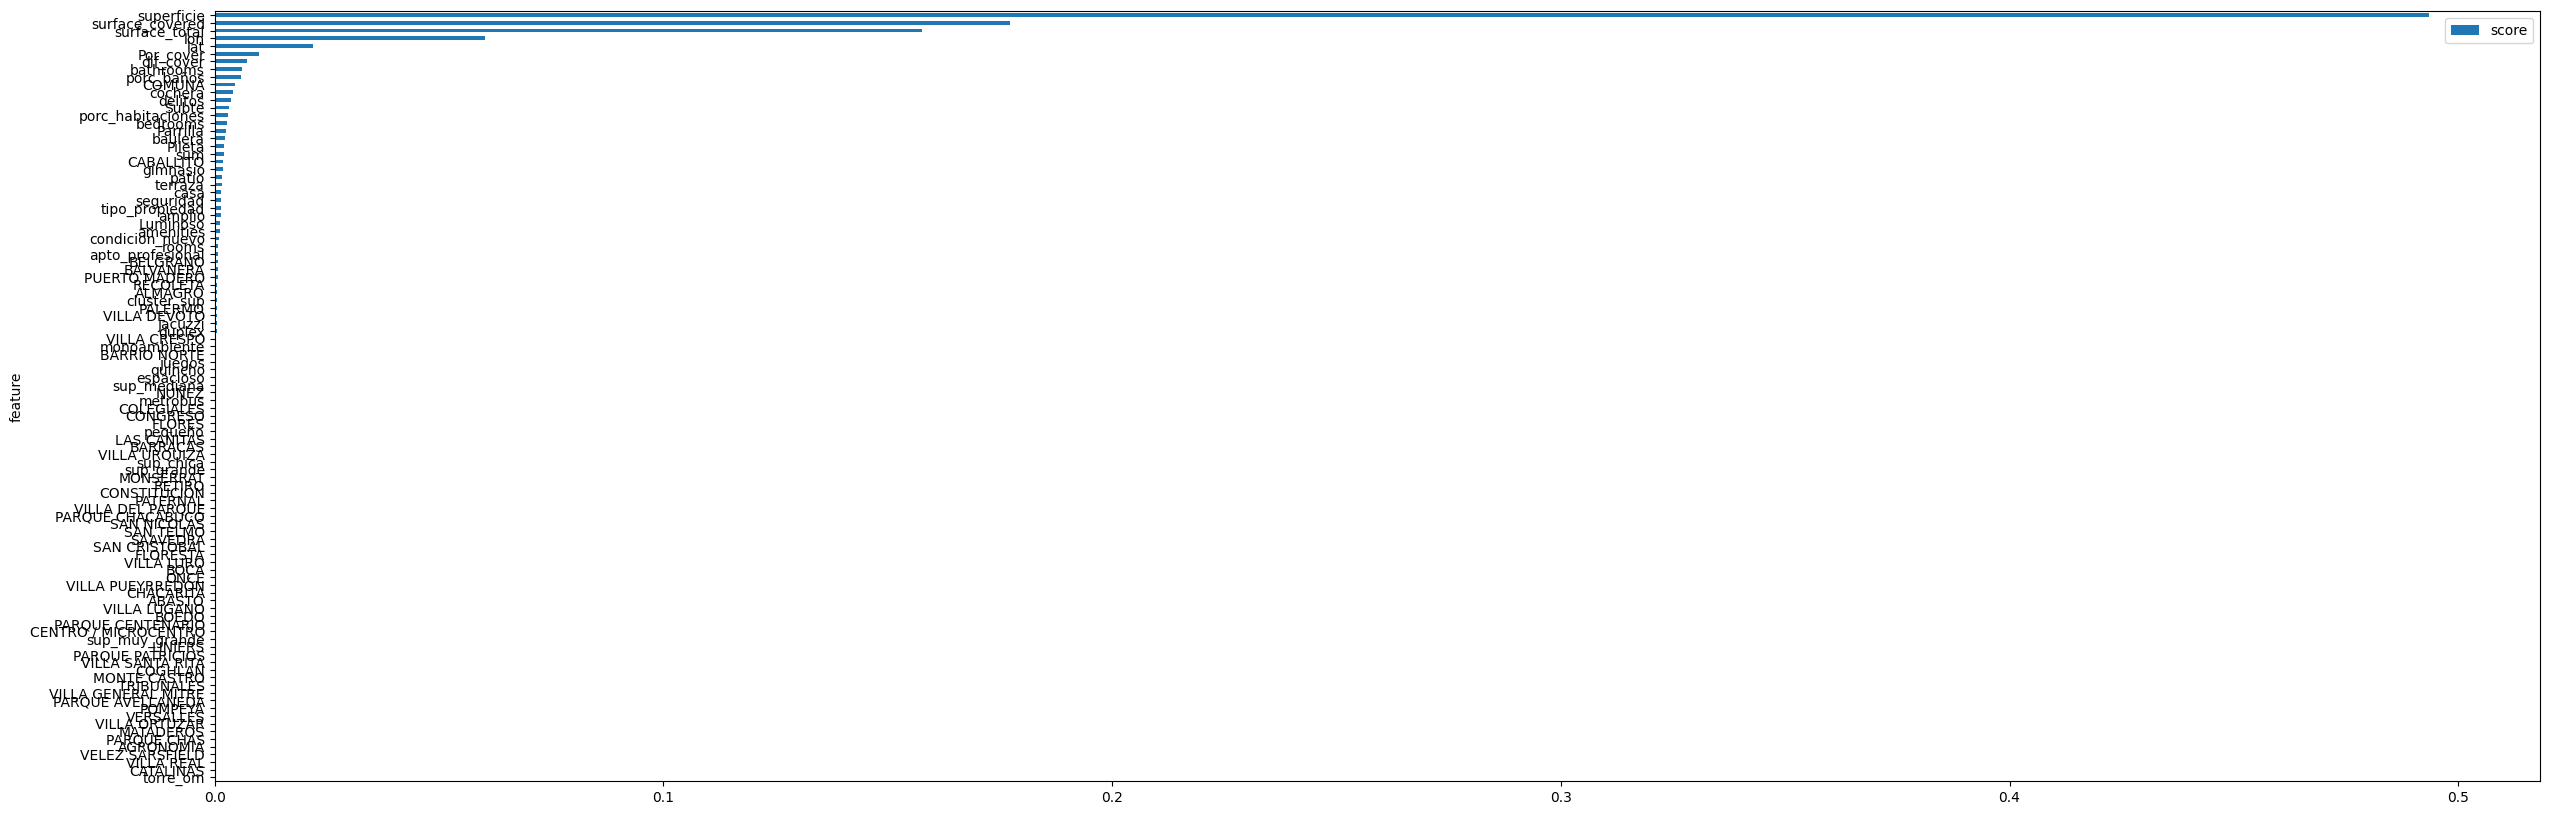

In [ ]:
df_scores = pd.DataFrame({"feature": X.columns, "score": reg.feature_importances_}).sort_values(by="score")
df_scores.plot.barh("feature", "score");

In [ ]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]


In [ ]:
forest_importances = pd.Series(importances, index=feature_names)
forest_importances.head()

feature 0    0.021970
feature 1    0.060321
feature 2    0.000851
feature 3    0.002796
feature 4    0.006112
dtype: float64

In [ ]:
forest_importances.sort_values(ascending=False)

feature 98    4.934697e-01
feature 6     1.773093e-01
feature 5     1.577280e-01
feature 1     6.032149e-02
feature 0     2.197037e-02
feature 35    9.913737e-03
feature 36    7.133048e-03
feature 4     6.111604e-03
feature 37    5.964652e-03
feature 33    4.643949e-03
feature 8     4.120519e-03
feature 34    3.650095e-03
feature 23    3.253486e-03
feature 38    2.903563e-03
feature 3     2.796194e-03
feature 13    2.547890e-03
feature 27    2.296806e-03
feature 14    2.019751e-03
feature 20    1.979251e-03
feature 48    1.898446e-03
feature 25    1.797241e-03
feature 10    1.672234e-03
feature 24    1.662885e-03
feature 22    1.521503e-03
feature 32    1.447743e-03
feature 12    1.407305e-03
feature 30    1.322814e-03
feature 21    1.204149e-03
feature 17    1.203986e-03
feature 11    1.074960e-03
feature 2     8.509462e-04
feature 15    8.039786e-04
feature 45    7.266173e-04
feature 42    6.727640e-04
feature 73    6.490417e-04
feature 74    6.100297e-04
feature 41    5.702194e-04
f

In [ ]:
# print(rf_cv.best_params_, rf_cv.best_score_)

In [ ]:
df_ap.head()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,jacuzzi,cochera,...,VILLA PUEYRREDÓN,VILLA REAL,VILLA SANTA RITA,VILLA URQUIZA,sup_chica,sup_mediana,sup_grande,sup_muy_grande,superficie,cluster_sup
id,,,,,,,,,,,,,,,,,,,,,
291,-58.423990,-34.589190,2.0,1.000000,1.0,42.0,42.0,NaN,0,1,...,0,0,0,0,1,0,0,0,-0.650451,0
638,-58.396664,-34.592536,4.0,3.000000,2.0,167.0,161.0,NaN,0,0,...,0,0,0,0,0,0,0,1,2.230657,1
1245,-58.414015,-34.604186,1.0,0.437486,1.0,43.0,39.0,NaN,0,0,...,0,0,0,0,0,1,0,0,-0.627403,0
1267,-58.453318,-34.650948,1.0,0.437340,1.0,39.0,36.0,NaN,0,0,...,0,0,0,0,1,0,0,0,-0.719598,0
1272,-58.453318,-34.650948,1.0,0.436949,1.0,30.0,28.0,NaN,0,0,...,0,0,0,0,1,0,0,0,-0.927038,0


# 6 Prediccion - Archivo CSV

In [ ]:
# Usamos las mismas columnas que en df
X_ap = df_ap[df.columns.drop("price")]

# Predecimos los precios de a_predecir.csv

df_ap["price"] = reg.predict(X_ap)

In [ ]:
# Grabamos la solución para ser subida en kaggle
df_ap["price"].to_csv("solucion.csv", index=True)